# Introductory Applied Machine Learning - Coursework 2

In [977]:
%matplotlib inline

import os
import sys
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_predict, StratifiedKFold
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.decomposition import PCA
from scipy.stats.stats import pearsonr
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
# from mpctools import extensions

sys.path.append('..')



In [2]:
print(sklearn.__version__)

0.21.2


# PART A: NEWSGROUPS

There are 8 news groups:
0. comp.sys.ibm.pc.hardware
1. comp.sys.mac.hardware
2. rec.autos
3. rec.motorcycles
4. sci.crypt
5. sci.electronics
6. talk.religion.misc, and
7. soc.religion.christian

# Question 1: Exploratory Analysis

In [3]:
# Training Data
training_data_location = os.path.join(os.getcwd(), 'Data', 'PartA', '20ng_train.csv')
training_data = pd.read_csv(training_data_location, delimiter=',', compression='bz2')

# Test Data
test_data_location = os.path.join(os.getcwd(), 'Data', 'PartA', '20ng_test.csv')
test_data = pd.read_csv(test_data_location, delimiter=',', compression='bz2')

In [4]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5648 entries, 0 to 5647
Columns: 1001 entries, __ to class
dtypes: float64(1000), int64(1)
memory usage: 43.1 MB


In [5]:
training_data.describe()

,__,ability,able,ac,accept,access,according,account,act,action,...,worth,wouldn,write,written,wrong,wrote,year,years,yes,class
count,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000,...,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000
mean,0.001708,0.001472,0.006335,0.002273,0.002466,0.004041,0.002923,0.001420,0.002057,0.001560,...,0.003717,0.004887,0.003494,0.002800,0.006421,0.001851,0.006020,0.008144,0.006705,3.345255
std,0.034360,0.016554,0.033866,0.026688,0.022362,0.030053,0.024208,0.018515,0.020301,0.020248,...,0.028373,0.033153,0.027797,0.025441,0.037083,0.020132,0.036011,0.037727,0.039841,2.208888
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
max,0.956585,0.443807,0.565277,0.711480,0.529982,0.635985,0.560049,0.461537,0.657318,0.631932,...,0.614346,0.698880,0.511068,0.596214,0.751603,0.561412,0.617048,0.438414,0.736056,7.000000


In [6]:
training_data.head(10)

,__,ability,able,ac,accept,access,according,account,act,action,...,worth,wouldn,write,written,wrong,wrote,year,years,yes,class
0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
5,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
6,0.0,0.0,0.0,0.0,0.000000,0.186521,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
7,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
8,0.0,0.0,0.0,0.0,0.182272,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
9,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1883 entries, 0 to 1882
Columns: 1001 entries, __ to class
dtypes: float64(1000), int64(1)
memory usage: 14.4 MB


In [8]:
test_data.describe()

,__,ability,able,ac,accept,access,according,account,act,action,...,worth,wouldn,write,written,wrong,wrote,year,years,yes,class
count,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,...,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000
mean,0.002292,0.002168,0.007335,0.002817,0.002701,0.004449,0.003012,0.001716,0.001886,0.001745,...,0.003018,0.005356,0.003746,0.003812,0.007960,0.001970,0.006214,0.008706,0.009449,3.345194
std,0.032391,0.021397,0.034312,0.032169,0.021777,0.032393,0.026133,0.022855,0.019504,0.018376,...,0.026231,0.033441,0.028779,0.032836,0.039182,0.020613,0.037389,0.041551,0.043570,2.208286
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
max,0.864159,0.469412,0.337561,0.620254,0.310053,0.504324,0.420903,0.632166,0.336667,0.387412,...,0.490894,0.481298,0.434553,0.543384,0.470697,0.566179,0.537827,0.532047,0.590114,7.000000


In [9]:
test_data.head(10)

,__,ability,able,ac,accept,access,according,account,act,action,...,worth,wouldn,write,written,wrong,wrote,year,years,yes,class
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,0.0,0.0,0.0,0.0,0.223984,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
5,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
6,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
7,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
8,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
9,0.0,0.0,0.0,0.0,0.065361,0.0,0.0,0.0,0.0,0.0,...,0.0,0.058623,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [10]:
traincount = 0
for key, item in training_data.groupby(['class']):
    print(key, len(item))
    traincount += len(item)
print(traincount)

0 737
1 722
2 742
3 747
4 743
5 738
6 748
7 471
5648


In [11]:
testcount = 0
for key, item in test_data.groupby(['class']):
    print(key, len(item))
    testcount += len(item)
print(testcount)

0 245
1 241
2 248
3 249
4 248
5 246
6 249
7 157
1883


## Questions

**a. [5 points] Focusing first on the training set, summarise the key features/observations in the data: focus on the dimensionality, data ranges, feature and class distribution and report anything out of the ordinary. What are the typical values of the features like?**

The training set has 5866 entries, which means it has 5866 different documents, with 1001 unique words (key features). It also has 8 different class labels representing each news group. After grouping the data into their respective classes, I found out that out of all the newsgroups, class 7 (`soc.religion.christian`) has significantly fewer data compared to the other classes. All of the other classes have more than 700 values, but class 7 has lesser than 500. By examining the mean and standard deviation of each word, I could see that the words have similar low TF-IDF values.

**b. [3 points] Looking now at the Testing set, how does it compare with the Training Set (in terms of sizes and feature-distributions) and what could be the repurcussions of this?**

The testing set has 1883 documents and 1001 unique words (similar to the training set). This means that the training set and the testing set are split 75% - 25%. This split is good because it does not overfit the model. I can see that there is a similar trend in the testing set with regards to the significantly lesser amount of data for class 7. All of the other classes have above 240 values and class 7 only has 157. Out of curiosity, I checked the percentage of class 7 in the training set and the test set and they were both 8.34%. This is not really a problem in the test set, however it might be in the training set because it's never a good idea to train with lesser data for a certain class. 

<br>LATEX FITTING ANSWER
<br>The testing set has 1883 documents and 1001 unique words. The training set and the testing set are split 75\% - 25\%. This split is good because it does not overfit the model. There is a similar trend in the testing set with regards to the significantly lesser amount of data for class 7. All of the other classes have above 240 values and class 7 only has 157. The percentage of class 7 in the training set and the test set and they were both 8.34\%. This is not a problem in the test set, unlike the training set because it's never a good idea to train with lesser data for a certain class.

In [12]:
print(str(471*100/5648))
print(str(157*100/1883))

8.339235127478753
8.337758895379713


**c. [2 points] Why do you think it is useful to consider TF-IDF weights as opposed to just the frequency of times a word appears in a document as a feature?**

TF-IDF (short for Term Frequency-Inverse Document Frequency) weights is a statistical measure to evaluate how important a word is to a document in a collection. The importance of a word is directly proportional to the word frequency in the document, but it is offset by the frequency of the word in the entire collection.

It is useful to consider TF-IDF as opposed to just the word frequency in the document because it helps eliminate 'unimportant' words that are used frequently from the feature vectors by setting their weight close to 0, such as stop words. It also helps avoid irrelevant and costly compuations.

# Question 2: (24 points) Unsupervised Learning

**2.1. [2 points] The K-Means algorithm is non-deterministic. Explain why this is, and how the final model is selected in the SKLearn implementation of KMeans.**

Non-deterministic means that running the algorithm several times on the same data, could give different results (test points classified differently in each iteration). This is due to the algorithm's random selection of data points as initial cluster centres. In the SKLearn implementation of KMeans, we do not explicitly select the initial cluster centres - instead, the model will select them for us. This will speed up the convergence of the algorithm.

**2.2. [1 point] One of the parameters we need to specify when using k-means is the number of clusters. What is a reasonable number for this problem and why?**

A reasonable number of clusters would be 8, because there are 8 news groups and we want to classify which words typically belong to a group.

**[2.3] (5 points) We will use the Adjusted Mutual Information (AMI) i.e. adjusted_mutual_info_score between the clusters and the true (known) labels to quantify the performance of the clustering. Give an expression for the MI in terms of entropy. In short, describe what the MI measures about two variables, why this is applicable here and why it might be difficult to use in practice. Hint: MI is sometimes referred to as Information Gain: note that you are asked only about the standard way we defined MI and not the AMI which is adjusted for the size of the domain and for chance agreement.**

The formula for Mutual Information (MI) in terms of entropy is the following:

\begin{equation} 
\text{MI}(U,V)= \sum_{i=1}^{|U|} \sum_{i=1}^{|V|} P(i,j)  \log{P(i,j)\over{P(i)P(j)}} = H(V) - H(V|U)
\end{equation}

where P(i,j) is the probability that an object picked at random falls into both classes Ui and Vj and is defined as: 

\begin{equation} 
P(i,j) = {|U_i \cap V_j| \over{N}}
\end{equation}

Mutual Information is a measure which tells us the reduction in uncertainty (decrease of entropy) about one random variable given knowledge of another. Unlike correlation, Mutual Information calculates the statistical dependence between the two variables.

In this case, since words are not independent, knowing one of them can give us more information about the next word (like how a the word 'the' is usually followed by a noun). 

In practice (for feature selection), we would like to maximise the mutual information between the subset of selected features and target variable, however maximising it is infeasible because the set of possible combinations of features grows exponentially.

MI = Entropy(y_true) - Entropy(y_true, y_preds)



--------------

The formula for Mutual Information (MI) in terms of entropy is the following:

\begin{equation} 
\text{MI}(U,V)= \sum_{i=1}^{|U|} \sum_{i=1}^{|V|} P(i,j)  \log{P(i,j)\over{P(i)P(j)}} = H(V) - H(V|U)
\end{equation}

where H(V)} is the entropy of V and H(V|U) is a measure of what V doesn't say about U. This means that H(V) - H(V|U) is the amount of uncertainty in V subtracted by the amount of uncertainty in V which remains after X is known. It follows that Mutual Information is the amount of information (decrease in uncertainty) you get about one variable given knowledge of another.

In this case, since words are not independent, knowing one of them can give us more information about the next word (like how a the word 'the' is usually followed by a noun). 

In practice (for feature selection), we would like to maximise the mutual information between the subset of selected features and target variable, however maximising it is infeasible because the set of possible combinations of features grows exponentially.

------------

LATEX ANSWER


The formula for Mutual Information (MI) in terms of entropy is the following:

\begin{equation} 
\text{MI}(U,V)= \sum_{i=1}^{|U|} \sum_{j=1}^{|V|} P(i,j)  \log{P(i,j)\over{P(i)P(j)}} = H(V) - H(V|U)
\end{equation}

where H(V) is the entropy of V and H(V|U) is a measure of what V doesn't say about U. It follows that MI is the amount of information (decrease in uncertainty) you get about one variable given knowledge of another. MI calculates the statistical dependence between the two variables. Since words are not independent, knowing one of them can give us more information about the next word (like how a the word 'the' is usually followed by a noun). In practice, maximising MI is infeasible because the set of possible combinations of features grows exponentially.


}

**2.4. [4 points] Fit K-Means objects with n_clusters ranging from 2 to 12. Set the random seed to 1000 and the number of initialisations to 50, but leave all other values at default. For each fit compute the adjusted mutual information (there is an SKLearn function for that). Set average_method=`max' . Plot the AMI scores against the number of clusters (as a line plot).**

In [1595]:
X = training_data.drop('class', axis=1)
y = training_data['class'].values

print(y)

[3 2 1 ... 5 2 3]


In [14]:
# for i in range(2,3):
#     kmeans = KMeans(n_clusters=i, random_state=1000, n_init=50)
#     kmeans.fit(X)
#     adjusted_mutual_info_score(y, kmeans.labels_)

In [15]:
kmeans = KMeans(n_clusters=2, random_state=1000, n_init=50)
kmeans.fit(X)
adjusted_mutual_info_score(y, kmeans.labels_, average_method='max')

0.09833132888683942

In [16]:
kmeans = KMeans(n_clusters=3, random_state=1000, n_init=50)
kmeans.fit(X)
adjusted_mutual_info_score(y, kmeans.labels_)

/Users/athiyadeviyani/miniconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


0.19754027411318142

In [17]:
kmeans = KMeans(n_clusters=4, random_state=1000, n_init=50)
kmeans.fit(X)
adjusted_mutual_info_score(y, kmeans.labels_)

/Users/athiyadeviyani/miniconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


0.2564638316247759

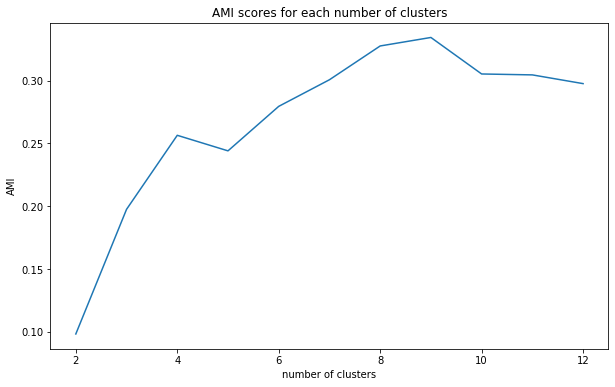

In [40]:
no_clusters = [2,3,4,5,6,7,8,9,10,11,12]
amis = []

for i in no_clusters:
    kmeans = KMeans(n_clusters=i, random_state=1000, n_init=50)
    kmeans.fit(X)
    ami = adjusted_mutual_info_score(y, kmeans.labels_, average_method='max')
    amis.append(ami)

# Plot a graph
plt.figure(figsize=(10,6))
plt.axes()
plt.plot(no_clusters, amis)
plt.title("AMI scores for each number of clusters")
plt.xlabel("number of clusters")
plt.ylabel("AMI");

In [28]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

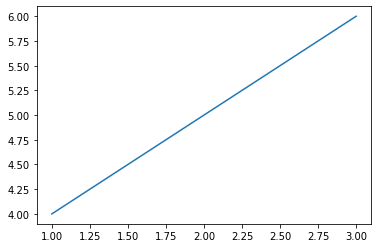

In [29]:
plt.plot([1,2,3],[4,5,6])

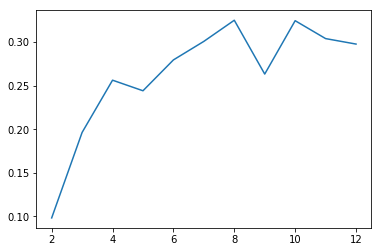

In [22]:
fig = plt.figure()
ax = plt.axes()
a = [0.09833132888683942,
0.19631405776174354,
0.25620733090585357,
0.2440905472039343,
0.27944383003358997,
0.30069857238308845,
0.32492151949761094,
0.2632306743098964,
0.3244013254498837,
0.3038880068206468,
0.2976031041980303,
]

i = [2,3,4,5,6,7,8,9,10,11,12]

ax.plot(i, a)

**2.5. [3 points] Discuss any trends and interesting aspects which emerge from the plot. Does this follow from your expectations?**

Since there are 8 newsgroups, I expected that the AMI score will be the highest when there are 8 clusters. However, the plot shows that the AMI score is the highest when there are 9 clusters. This might be because there are some ambiguous words that falls in more than 1 cluster and these ambiguous words are clustered together into a separate cluster, keeping the 8 other clusters containing only words that fall into that specific cluster.

After that goes lower because of overfititng

The plot of AMI scores against the number of clusters shows a peak at n=9. I found this quite interesting because I expected that the AMI score will be the highest when there are 8 clusters, since there are 8 newsgroups. This might be because there are some ambiguous words that falls in more than 1 cluster and these ambiguous words are clustered together into a separate cluster, keeping the 8 other clusters relatively pure. As the number of clusters increase past 9, the AMI score decreases due to overfitting.

**2.6. [6 points] Let us investigate the case with four (4) clusters in some more detail. Using seaborn's countplot function, plot a bar-chart of the number of data-points with a particular class (encoded by colour) assigned to each cluster centre (encoded by position on the plot's x-axis). As part of the cluster labels, include the total umber of data-points assigned to that cluster.**

[3 3 3 ... 3 3 3]


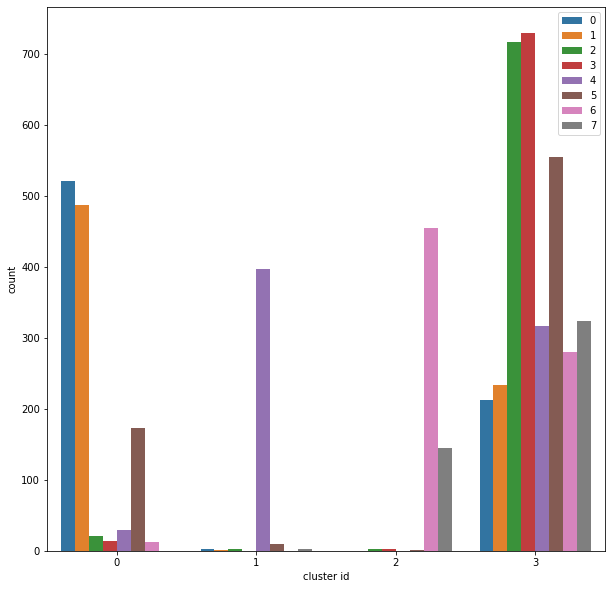

In [1599]:
kmeans = KMeans(n_clusters=4, random_state=1000, n_init=50)
kmeans.fit(X)

print(kmeans.labels_)

In [1603]:
kmeans_dict = {}
for i in kmeans.labels_:
    kmeans_dict.setdefault(i,0)
    kmeans_dict[i] += 1
    
print(kmeans_dict)

kmeans_list = [(0, 1258), (1, 414), (2, 606), (3, 3370)]

{3: 3370, 2: 606, 1: 414, 0: 1258}


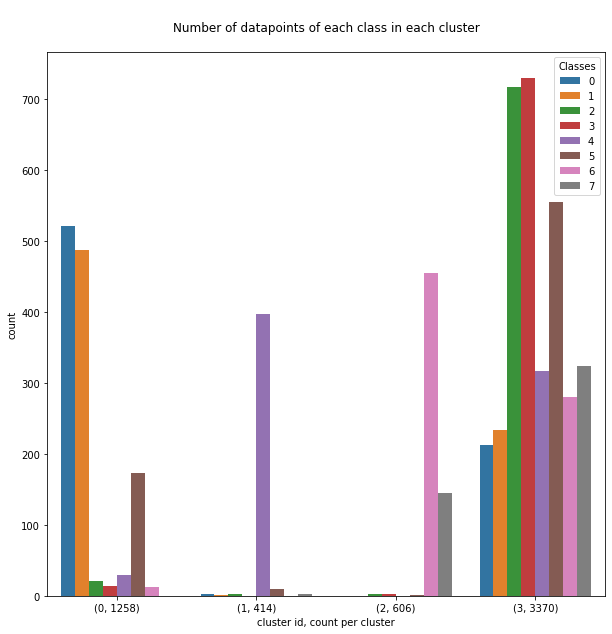

In [1621]:
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.countplot(x=kmeans.labels_, hue=y, ax=ax).set(xticks=range(len(kmeans_list)), xticklabels=kmeans_list)
plt.xlabel('cluster id, count per cluster')
plt.title('\nNumber of datapoints of each class in each cluster\n', fontsize=12)
plt.legend(title='Classes')
plt.show()

**2.7. [3 points] How does the clustering in Question2:(f) align with the true class labels? Does it conform to your observations in Q 2(e)?**

After looking at the 8 different newsgroups, I realized that there are 4 bigger subgroups that you can generalise from the 8 newsgroups:

1. Electronics (class 0 (`comp.sys.ibm.pc.hardware`), 1 (`comp.sys.mac.hardware`) and 5 (`sci.electronics`))
2. Automotive (class 2 (`rec.autos`) and 3 (`rec.motorcycles`))
3. Religion (class 6 (`soc.religion.christian`) and 7 (`talk.religion,misc`))
3. Cryptography (class 4 (`sci.crypt`))

This is noticable in the bar chart - the first cluster has the main datapoint as classes 0, 1 and 5 which are in the Electronics subgroup, the second cluster contains almost only class 4 which belongs in the cryptography subgroup, the third cluster has the main datapoint the classes 6 and 7 which belongs in the religion subgroup. The last cluster has a mix of all the clusters but its main datapoint are classes 2 and 3 which falls under the automotive subgroup.

I'm not surprised that the first cluster has the purest countplot because the the cryptography newsgroup is quite diverse from all the other newsgroups. The cryptography newsgroup is well separated and this is well identified by the clustering algorithm. The labels that are the hardest to determine by the data point cluster assignment are classes 2 and 3 which are confused with all the other classes.

The plot conforms with my observations in Q(2.e) as there is a local maxima when the number of clusters is 4. The clustering has somewhat been successful at separating the data into their bigger subgroups, however not all the clusters are pure.

--- 

LATEX answer


There are 4 bigger subgroups that you can generalise from the 8 newsgroups. This is noticeable in the bar chart - the 1st cluster has the main datapoint as classes 0, 1 and 5 (Electronics), the 2nd cluster contains almost only class 4 (Cryptography), the 3rd cluster has the classes 6 and 7 (Religion). The last cluster has a mix of all the classes but its main datapoint are classes 2 and 3 (Automotive).
The cryptography group is well-separated and this is well-identified by the clustering algorithm. The classes that are the hardest to determine by the cluster assignments are classes 2 and 3 which are confused with all the other classes. The plot conforms with my observations in Q(2.e) as there is a local maxima when the number of clusters is 4 and the clustering has been somewhat successful at separating the data into their bigger subgroups, however not all the clusters are pure.


# Question 3: (26 points) Logistic Regression Classification

We will now try out supervised classification on this data. We will focus on Logistic Regression and measure performance in terms of the F1 score (familiarise yourself with this score which is related to the precision and recall scores that we learnt about in class).

In most cases, we will need to validate hyper-parameters: to this end, we will use K-Fold cross validation. Using the provided SKLearn implementation for StratifiedKFold, create a 10-Fold stratified split of the data. Make sure to set the random state to 0 for reproducibility, and turn on shuffling. We will use the same splits provided by this throughout this question.

**3.1. [3 points] What is the F1-score, and why is it preferable to accuracy in our problem?
How does the macro-average work to extend the score to multi-class classification?**

The F1-score is defined as follows:
\begin{equation} 
\ {2 \times \text{precision} \times \text{recall}}\over{\text{precision} + \text{recall}}
\end{equation}

It conveys the balance between the precision and the recall. It is more preferable to use accuracy in our porblem because false positives and false negatives have similar cost and we have relatively even classes.

To calculate the classifier's overall F1-score combine the per-class F1-scores into a single number. The simplest way to do that is to is to compute an arithmetic mean of the per-class F1-scpres, called the macro-average.

---

LATEX answer

The F1-score ((2*precision*recall)/(precision+recall)) conveys the balance between the precision and the recall. It is more preferable to use accuracy in our problem because false positives and false negatives have similar cost and we have relatively even classes. To calculate the classifier's overall F1-score combine the per-class F1-scores into a single number. The simplest way to do that is to is to compute an arithmetic mean of the per-class F1-scores, called the macro-average.

**3.2. [2 points] As always we start with a simple baseline classifier. Define such a classifier (indicating why you chose it) and report its performance on the Test set. Use the `macro`
average for the f1_score.**

I selected the class that has the most observations (in this case it's a tie between classes 3 and 6) and used that class as the result for all the predictions. This method is theoretically expected to perform better than random guessing. 

After running the baseline classifier (predicting that all the values belong to class 3) I obtained the F1-score of 0.0292.

In [53]:
# TEST SET - test_data


y_test_baseline = test_data['class']
_, items_per_class = np.unique(y_test_baseline, return_counts=True)
class_with_most_items = np.max(items_per_class)
baseline_accuracy = class_with_most_items.astype('float') / len(y_test_baseline)

baseline_accuracy

0.13223579394583113

In [54]:
f1ss = []
for i in range(0,8):
    baseline_prediction = [i]*1883
    f1s = f1_score(test_data['class'],baseline_prediction,average='macro')
    f1ss.append(f1s)
    print('F1 score for i=' + str(i) + ' is ' + str(f1s))
print(max(f1ss))

F1 score for i=0 is 0.028782894736842105
F1 score for i=1 is 0.028366290018832393
F1 score for i=2 is 0.02909432191459409
F1 score for i=3 is 0.029197936210131333
F1 score for i=4 is 0.02909432191459409
F1 score for i=5 is 0.028886801315171445
F1 score for i=6 is 0.029197936210131333
F1 score for i=7 is 0.019240196078431374
0.029197936210131333


/Users/athiyadeviyani/miniconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [1211]:
dict = {}
for i in test_data['class']:
    dict.setdefault(i,0)
    dict[i] += 1
print(dict)
    

{4: 248, 0: 245, 3: 249, 6: 249, 2: 248, 1: 241, 7: 157, 5: 246}


In [544]:
test_data['class']

0       4
1       0
2       3
3       3
4       6
       ..
1878    2
1879    5
1880    0
1881    5
1882    4
Name: class, Length: 1883, dtype: int64

In [546]:
[2]*1883

[2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,


**3.3. [3 points] We will now train a LogisticRegression Classifier from SKLearn. By referring to the documentation, explain how the Logistic Regression model can be applied to classify multi-class labels as in our case. Hint: Limit your explanation to methods we
discussed in the lectures.**

The LogisticRegression Classifier can fit binary, One-vs-Rest, or multinomial logistic regression. Multi-class logistic regression utilises the softmax function to get the class probabilities. This function replaces the sigmoid logistic function used in binary logistic regression. The output of a softmax function is equal to the number of classes, and they sum up to one, therefore they are equal to the probabilities of each class.

The softmax function is defined below:

\begin{equation}
\text{Softmax}(x_{i}) = \frac{\exp(x_i)}{\sum_j \exp(x_j)}
\end{equation}

**3.4. [4 points] Train a Logistic Regressor on the training data. Set solver='lbfgs', multi_class='multinomial' and random_state=0. Use the Cross-Validation object you created and report the average validation-set F1-score as well as the standard deviation.
Comment on the result.**

In [1968]:
lr = LogisticRegression(solver='lbfgs', 
                        multi_class='multinomial', 
                        random_state=0)

In [1969]:
X_train = training_data.drop('class', axis = 1).values
y_train = training_data['class']

In [1970]:
#logisticRegressor.fit(X_train, y_train)

In [1971]:
skfold = StratifiedKFold(n_splits=10)
datasplit = skfold.split(X_train, y_train)
f1scores = []
stds = []
rmses = []

for trn_idx, tst_idx in datasplit:

    X_trn, X_tst = X_train[trn_idx], X_train[tst_idx]
    y_trn, y_tst = y_train[trn_idx], y_train[tst_idx]
    
    lr.fit(X_trn, y_trn)
    y_pred = lr.predict(X_tst)
    f1 = f1_score(y_tst, y_pred, average='macro')
    std = y_pred.std()
    f1scores.append(f1)
    stds.append(std)
    
    rmse = mean_squared_error(y_tst, y_pred)**0.5
    rmses.append(rmse)
    
    print("F1-score is: {}".format(f1))
    print("Standard deviation is: {}".format(std))
    #f1_score(y_tst, y_pred, average='macro')

print("======================================")
print("Average f1 score is " + str(np.sum(f1scores)/len(f1scores)))
print("Average standard deviation is " + str(np.sum(stds)/len(stds)))
print("Average RMSE is " + str(np.sum(rmses)/len(rmses)))

F1-score is: 0.6625495496128986
Standard deviation is: 2.134835443282763
F1-score is: 0.6804918899173111
Standard deviation is: 2.0545216449687045
F1-score is: 0.6815497804608959
Standard deviation is: 2.118289090776395
F1-score is: 0.6425966123149198
Standard deviation is: 2.1549761016285855
F1-score is: 0.685255241774714
Standard deviation is: 2.0979088895436004
F1-score is: 0.6942403363745525
Standard deviation is: 2.140068205865807
F1-score is: 0.6667317607628829
Standard deviation is: 2.1692819829158676
F1-score is: 0.6569984934920572
Standard deviation is: 2.141263620051749
F1-score is: 0.6582862150524074
Standard deviation is: 2.1473693936241536
F1-score is: 0.6510492803037036
Standard deviation is: 2.116099532381271
Average f1 score is 0.6679749160066343
Average standard deviation is 2.12746139050389
Average RMSE is 1.520433530065417


In [1972]:
rmses

[1.4815799290338652,
 1.550783536624241,
 1.4997055070159113,
 1.660045846472133,
 1.5116070098449494,
 1.3819314430442402,
 1.5903469872398943,
 1.4738694978271387,
 1.5286917268442075,
 1.5257738167075898]

In [1973]:
np.std(f1scores)

0.01582814519035335

The average validation-set F1-score is 0.668 and the standard deviation is 0.0158. The baseline classifier has a much lower F1-score which 0.0291. Therefore, the logistic regression classifier performs significantly better than the baseline classifier.

Average validation-set F1-score = 0.668
<br>Standard deviation = 0.0158

<br>The baseline classifier has significantly lower F1-score at 0.0291. Therefore, the logistic regression classifier performs significantly better than the baseline classifier. This shows a successful classification by the logistic model.

[3.5] (5 points) We will now optimise the Regularisation parameter C using cross-validation.
Train a logistic regressor for dierent values of C : in each case, evaluate the F1 score on
the training and validation portion of the fold. That is, for each value of C you must
provide the training set and validation-set scores per fold and then compute (and store)
the average of both over all folds. Finally plot the (average) training and validation-set
scores as a function of C . Hint: Use a logarithmic scale for C , spanning 19 samples
between 10 −4 to 10 5 .

In [1974]:
import math
logs = np.logspace(start=-4, stop=5, num=19)
logs

n = []
for i in range(-4, 5):
    s = math.pow(10, i)
    n.append(s)
n

[0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]

In [1975]:
logs

array([1.00000000e-04, 3.16227766e-04, 1.00000000e-03, 3.16227766e-03,
       1.00000000e-02, 3.16227766e-02, 1.00000000e-01, 3.16227766e-01,
       1.00000000e+00, 3.16227766e+00, 1.00000000e+01, 3.16227766e+01,
       1.00000000e+02, 3.16227766e+02, 1.00000000e+03, 3.16227766e+03,
       1.00000000e+04, 3.16227766e+04, 1.00000000e+05])

In [1976]:
# f1_avg = []

# for c in logs:
    
#     lrc = LogisticRegression(multi_class='multinomial',
#                              solver='lbfgs',
#                              random_state=0,
#                              n_iter=1000,
#                              C=float(c))
#     sum = 0
    
#     for trn_idx, tst_idx in skfold.split(X_train, y_train):
    
#         X_trn, X_tst = X_train[trn_idx], X_train[tst_idx]
#         y_trn, y_tst = y_train[trn_idx], y_train[tst_idx]   
        
#         lrc.fit(X_trn, y_trn)
#         y_pred_c = lrc.predict(X_tst)
        
#         sum = sum + f1_score(y_tst, y_pred_c, average='micro')
        
#     f1_avg.append(sum/10)

In [1977]:
#

In [1978]:
# f1_avg_trn = []
# f1_avg_val = []

# for c in logs:
    
#     lrc = LogisticRegression(multi_class='multinomial',
#                              solver='lbfgs',
#                              random_state=0,
#                              C=float(c))
#     sum_trn = 0
#     sum_val = 0
    
#     for trn_idx, tst_idx in skfold.split(X_train, y_train):
    
#         X_trn, X_tst = X_train[trn_idx], X_train[tst_idx]
#         y_trn, y_tst = y_train[trn_idx], y_train[tst_idx]   
        
#         lrc.fit(X_trn, y_trn)
#         y_pred_c = lrc.predict(X_tst)
#         f1_tst = f1_score(y_tst, y_pred_c, average='micro')
        
#         y_pred_c_trn = lrc.predict(X_trn)
#         f1_trn = f1_score(y_trn, y_pred_c_trn, average='micro')
        
#         sum_val = sum_val + f1_tst
#         sum_trn = sum_trn + f1_trn
        
#     f1_avg_trn.append(sum_trn/10)
#     f1_avg_val.append(sum_val/10)

In [1979]:
from numpy import arange
mylogsarray = []
for i in arange(-4, 5.5, 0.5):
    mylogsarray.append(10**i)
    
mylogsarray = np.array(mylogsarray)

In [1980]:
mylogsarray

array([1.00000000e-04, 3.16227766e-04, 1.00000000e-03, 3.16227766e-03,
       1.00000000e-02, 3.16227766e-02, 1.00000000e-01, 3.16227766e-01,
       1.00000000e+00, 3.16227766e+00, 1.00000000e+01, 3.16227766e+01,
       1.00000000e+02, 3.16227766e+02, 1.00000000e+03, 3.16227766e+03,
       1.00000000e+04, 3.16227766e+04, 1.00000000e+05])

In [1981]:
f1_avg_trn = []
f1_avg_val = []

for c in mylogsarray:
    
    lrc = LogisticRegression(multi_class='multinomial',
                             solver='lbfgs',
                             random_state=0,
                             C=float(c))
    sum_trn = 0
    sum_val = 0
    
    for trn_idx, tst_idx in skfold.split(X_train, y_train):
    
        X_trn, X_tst = X_train[trn_idx], X_train[tst_idx]
        y_trn, y_tst = y_train[trn_idx], y_train[tst_idx]   
        
        lrc.fit(X_trn, y_trn)
        y_pred_c = lrc.predict(X_tst)
        f1_tst = f1_score(y_tst, y_pred_c, average='macro')
        
        y_pred_c_trn = lrc.predict(X_trn)
        f1_trn = f1_score(y_trn, y_pred_c_trn, average='macro')
        
        sum_val = sum_val + f1_tst
        sum_trn = sum_trn + f1_trn
        
    f1_avg_trn.append(sum_trn/10)
    f1_avg_val.append(sum_val/10)

/Users/athiyadeviyani/miniconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/athiyadeviyani/miniconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/athiyadeviyani/miniconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/athiyadeviyani/miniconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being

/Users/athiyadeviyani/miniconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/athiyadeviyani/miniconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/athiyadeviyani/miniconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/athiyadeviyani/miniconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being

/Users/athiyadeviyani/miniconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/athiyadeviyani/miniconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/athiyadeviyani/miniconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/athiyadeviyani/miniconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being

/Users/athiyadeviyani/miniconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/athiyadeviyani/miniconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/athiyadeviyani/miniconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/athiyadeviyani/miniconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being

/Users/athiyadeviyani/miniconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/athiyadeviyani/miniconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/athiyadeviyani/miniconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/athiyadeviyani/miniconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/athiyadeviyani/miniconda3/env

/Users/athiyadeviyani/miniconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/athiyadeviyani/miniconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/athiyadeviyani/miniconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/athiyadeviyani/miniconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/athiyadeviyani/miniconda3/env

/Users/athiyadeviyani/miniconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/athiyadeviyani/miniconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/athiyadeviyani/miniconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/athiyadeviyani/miniconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/athiyadeviyani/miniconda3/env

In [1982]:
f1_avg_trn

[0.10703140256122261,
 0.21548417182440952,
 0.41790512235978694,
 0.5838865969452487,
 0.629373685066074,
 0.6406381808490942,
 0.6843995074458892,
 0.759086530189456,
 0.8164364713275418,
 0.866934953086056,
 0.9167396850860857,
 0.9486638838815331,
 0.9623394393559753,
 0.9665865322845552,
 0.967719555982456,
 0.967951302546672,
 0.9678322835729871,
 0.9680079624325424,
 0.9678408183480178]

In [1983]:
indexx = f1_avg_val.index(np.max(f1_avg_val))
indexx
mylogsarray[indexx]

1.0

In [1984]:
np.max(f1_avg_val)

0.6679749160066344

In [1985]:
f1_avg_val

[0.10364226581254928,
 0.20733717648693384,
 0.39888550035445364,
 0.5502835219044352,
 0.5898878910489609,
 0.5989348736169745,
 0.6230525033812178,
 0.6648112427530627,
 0.6679749160066344,
 0.6645252953844603,
 0.6500071982556552,
 0.6330947435911992,
 0.6243806583719098,
 0.6279712711655775,
 0.6285727073476063,
 0.627254480190033,
 0.626573755075056,
 0.6275629806375151,
 0.6260848461295174]

In [1987]:
mylogsarray

array([1.00000000e-04, 3.16227766e-04, 1.00000000e-03, 3.16227766e-03,
       1.00000000e-02, 3.16227766e-02, 1.00000000e-01, 3.16227766e-01,
       1.00000000e+00, 3.16227766e+00, 1.00000000e+01, 3.16227766e+01,
       1.00000000e+02, 3.16227766e+02, 1.00000000e+03, 3.16227766e+03,
       1.00000000e+04, 3.16227766e+04, 1.00000000e+05])

In [1988]:
average = []
for i in range(len(f1_avg_trn)):
    average.append((f1_avg_trn[i] + f1_avg_val[i])/2)

average

[0.10533683418688594,
 0.21141067415567166,
 0.40839531135712026,
 0.567085059424842,
 0.6096307880575175,
 0.6197865272330343,
 0.6537260054135534,
 0.7119488864712593,
 0.7422056936670881,
 0.7657301242352581,
 0.7833734416708704,
 0.7908793137363661,
 0.7933600488639425,
 0.7972789017250663,
 0.7981461316650311,
 0.7976028913683526,
 0.7972030193240216,
 0.7977854715350288,
 0.7969628322387676]

In [1989]:
mylogsarray

array([1.00000000e-04, 3.16227766e-04, 1.00000000e-03, 3.16227766e-03,
       1.00000000e-02, 3.16227766e-02, 1.00000000e-01, 3.16227766e-01,
       1.00000000e+00, 3.16227766e+00, 1.00000000e+01, 3.16227766e+01,
       1.00000000e+02, 3.16227766e+02, 1.00000000e+03, 3.16227766e+03,
       1.00000000e+04, 3.16227766e+04, 1.00000000e+05])

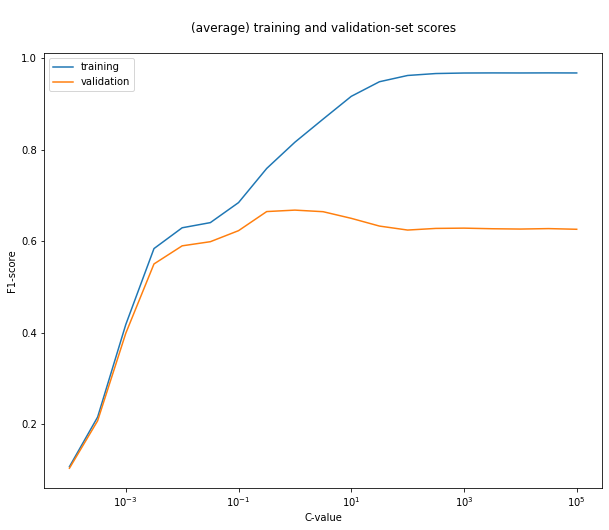

In [1990]:
plt.figure(figsize=(10,8))
#plt.plot(logs, average, label='average')
plt.plot(logs, f1_avg_trn, label='training')
plt.plot(logs, f1_avg_val, label='validation')
plt.xticks([1.00000000e-04, 3.16227766e-04, 1.00000000e-03, 3.16227766e-03,
       1.00000000e-02, 3.16227766e-02, 1.00000000e-01, 3.16227766e-01,
       1.00000000e+00, 3.16227766e+00, 1.00000000e+01, 3.16227766e+01,
       1.00000000e+02, 3.16227766e+02, 1.00000000e+03, 3.16227766e+03,
       1.00000000e+04, 3.16227766e+04, 1.00000000e+05], [1.00000000e-04, 3.16227766e-04, 1.00000000e-03, 3.16227766e-03,
       1.00000000e-02, 3.16227766e-02, 1.00000000e-01, 3.16227766e-01,
       1.00000000e+00, 3.16227766e+00, 1.00000000e+01, 3.16227766e+01,
       1.00000000e+02, 3.16227766e+02, 1.00000000e+03, 3.16227766e+03,
       1.00000000e+04, 3.16227766e+04, 1.00000000e+05]) 
plt.xscale('log')
plt.title('\n(average) training and validation-set scores\n', fontsize=12)
plt.xlabel('C-value')
plt.ylabel('F1-score')
plt.legend()
#plt.axvline(1.0, color='r', linestyle='--')

[3.6] (7 points) What is the optimal value of C (and the corresponding score)? How did
you choose this value? By making reference to the effect of the regularisation parameter
C on the optimisation, explain what is happening in your plot from Question 3:(e) Hint:
Refer to the documentation for C in the LogisticRegression page on SKLearn .

Since I trained the model with the training set, I used the validation set for evaluating the performance of the model for different values of C. The most optimal value of C is 1.0 with a corresponding F1-score of 0.668. I chose this value by examining the F1-scores of the validation set and looked at the maximum, and find the corresponding value of C that yield that value. 

The effect of the regul
arisation parameter C on the optimisation is strong. This causes the model to become less sensitive to noise. However, at some point it becomes insensitive to important features. this is shown by the F1-score being low on small C values. Then the F1-score increases when C increased and reached its peak at 1.0, and after that it continues to decrease until it reaches a (somewhat) plateau.

[3.7] (2 points) Finally, report the score of the best model on the test-set, after retraining
on the entire training set (that is drop the folds). Hint: You may need to set max_iter
= 200 . Comment briefly on the result.

The F1-score on the test set is 0.675 after using the optimal C-value and retraining on the entire training set. This value is higher than the average validation-set F1-score (0.668) that I calculated in Q(3.d) and the average validation-set F1-score (0.668) that I calculated in Q(3.e) using folds.

In [1585]:
X_train = training_data.drop('class', axis=1)
y_train = training_data['class']

X_test = test_data.drop('class', axis=1)
y_test = test_data['class']

In [1653]:
lr_test = LogisticRegression(multi_class='multinomial',
                            solver='lbfgs',
                            random_state=0,
                            C=1.0,
                            max_iter=200)

In [1654]:
lr_test.fit(X_train, y_train)
y_pred_test = lr_test.predict(X_test)

f1_test = f1_score(y_test, y_pred_test, average='macro')

print("F1-score is: {}".format(f1_test))

F1-score is: 0.6747698176259582


# PART B: BRISTOL AIR-QUALITY [90 POINTS]

Load the dataset BristolAir_Exploratory.csv into a pandas dataframe. Again, you
should use pandas.read_csv() with the compression ag `bz2': remember also that the
rst line is the header.

# Question 4 : (30 Points) Exploratory Analysis

In [1137]:
# Load the dataset
bristol_loc = os.path.join(os.getcwd(), 'Data', 'PartB', 'BristolAir_Exploratory.csv')
bristol_exp = pd.read_csv(bristol_loc, delimiter=',', compression='bz2')

In [1138]:
bristol_exp

,Date Time,NOx,NO2,NO,SiteID,Loc.Lat,Loc.Long
0,2007-03-27 13:00:00+00:00,87.000000,28.000000,28.750000,1,51.441747,-2.559956
1,2007-03-27 14:00:00+00:00,98.500000,32.000000,32.500000,1,51.441747,-2.559956
2,2007-03-27 20:00:00+00:00,202.000000,97.750000,68.000000,6,51.427864,-2.563742
3,2007-03-28 02:00:00+00:00,107.800000,39.520000,44.520000,8,51.489993,-2.688779
4,2007-03-28 04:00:00+00:00,115.780000,31.940000,54.670000,8,51.489993,-2.688779
5,2007-03-28 07:00:00+00:00,410.500000,49.500000,218.250000,1,51.441747,-2.559956
6,2007-03-28 08:00:00+00:00,295.480000,53.350000,157.870000,8,51.489993,-2.688779
7,2007-03-28 12:00:00+00:00,129.750000,39.500000,45.500000,1,51.441747,-2.559956
8,2007-03-28 13:00:00+00:00,162.860000,69.530000,60.850000,8,51.489993,-2.688779
9,2007-03-28 13:00:00+00:00,217.750000,86.000000,86.250000,10,51.460674,-2.582253


In [28]:
bristol_exp.describe()

,NOx,NO2,NO,SiteID,Loc.Lat,Loc.Long
count,1.191220e+06,1.188426e+06,1.197536e+06,1.306758e+06,1.306758e+06,1.306758e+06
mean,1.200819e+02,4.493445e+01,4.956930e+01,8.411554e+00,5.145213e+01,-2.580516e+00
std,1.428863e+02,3.183197e+01,7.645375e+01,5.329009e+00,1.607845e-02,2.738316e-02
min,-3.108000e+01,-6.669844e+00,-1.771000e+01,0.000000e+00,5.142786e+01,-2.688779e+00
25%,3.550000e+01,2.200000e+01,7.000000e+00,4.000000e+00,5.144175e+01,-2.592724e+00
50%,7.300000e+01,3.800000e+01,2.200000e+01,7.000000e+00,5.145543e+01,-2.582253e+00
75%,1.450000e+02,5.950000e+01,5.700000e+01,1.400000e+01,5.146067e+01,-2.562714e+00
max,2.164250e+03,5.765000e+02,1.231250e+03,1.700000e+01,5.148999e+01,-2.535230e+00


In [29]:
bristol_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306758 entries, 0 to 1306757
Data columns (total 7 columns):
Date Time    1306758 non-null object
NOx          1191220 non-null float64
NO2          1188426 non-null float64
NO           1197536 non-null float64
SiteID       1306758 non-null int64
Loc.Lat      1306758 non-null float64
Loc.Long     1306758 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 69.8+ MB


In [30]:
bristol_exp.ndim

2

In [31]:
bristol_exp.shape

(1306758, 7)

In [32]:
bristol_exp.size

9147306

In [33]:
bristol_exp['SiteID'].nunique()

18

In [37]:
for key, item in bristol_exp.groupby(['SiteID']):
    print("SITE NUMBER: " + str(key))
    print("NUMBER OF ITEMS: " + str(len(item)))

SITE NUMBER: 0
NUMBER OF ITEMS: 6446
SITE NUMBER: 1
NUMBER OF ITEMS: 163111
SITE NUMBER: 2
NUMBER OF ITEMS: 62990
SITE NUMBER: 3
NUMBER OF ITEMS: 25464
SITE NUMBER: 4
NUMBER OF ITEMS: 74787
SITE NUMBER: 5
NUMBER OF ITEMS: 113952
SITE NUMBER: 6
NUMBER OF ITEMS: 142141
SITE NUMBER: 7
NUMBER OF ITEMS: 115162
SITE NUMBER: 8
NUMBER OF ITEMS: 43824
SITE NUMBER: 9
NUMBER OF ITEMS: 22071
SITE NUMBER: 10
NUMBER OF ITEMS: 96407
SITE NUMBER: 11
NUMBER OF ITEMS: 20693
SITE NUMBER: 12
NUMBER OF ITEMS: 45240
SITE NUMBER: 13
NUMBER OF ITEMS: 12423
SITE NUMBER: 14
NUMBER OF ITEMS: 113951
SITE NUMBER: 15
NUMBER OF ITEMS: 2712
SITE NUMBER: 16
NUMBER OF ITEMS: 154331
SITE NUMBER: 17
NUMBER OF ITEMS: 91053


**[4.1] (6 points) Summarise the key features/observations in the data: describe the purpose
of each column and report (briefly) also on the dimensionality/ranges (ballpark figures
only, and how they compare across features) and number of sites, and identify anything
out of the ordinary/problematic: i.e. look out for missing data and negative values. Why
are the latter unreasonable in such a dataset? Hint: Refer to the documentation for how
to interpret the pollutant values.**

There are 1306758 values for each column - Date/Time, followed by the three pollutants, SiteID, and the latitude and longitude of the site. After briefly looking at the data, I could see that there are some samples that are either empty or have a value below 0 (negative). These are unreasonable because the values are measured in micro-grams per meter cube, and they only range over positive values. There are 18 unique sites in total that are being studied. Grouping the data into their respective SiteIDs, I noticed that there are significantly lesser values for site 15 than all the other sites, with only 2712 values, followed by site 0 with 6446. This is very few compared to sites 1, 5, 6, 7, 14, 16, which has more than 100000 values. All the other sites range between 10000 and 100000. This unbalanced split of values for each site might cause us to draw assumptions or conclusions that are not actually true due to the lack of data and we might overgeneralise. For the pollutants, NOx has the highest mean, followed by NO and NO2.

**[4.2] (6 points) Repeat the same analysis but this time on a per-site basis. Provide a table with the number of samples and percentage of problematic samples (negative and missing) in each site: i.e. for each issue, count the number of samples having that issue in at least one of the columns. Hint: Pandas has a handy method, to_latex() , for generating a latex table from a dataframe.**

In [2095]:
total = 0
total_missing = []
percentage_prob = []
total_negative = []
total_sampless = []
for key, item in bristol_exp.groupby(['SiteID']):
    first = bristol_exp.groupby(['SiteID']).get_group(key).isnull().any(axis=1) # missing
    second = (bristol_exp.groupby(['SiteID']).get_group(key).iloc[:,1:4] < 0).all(1) # negative
    total_samples = len(item)
    boolean_list = first | second 
    total_missing.append(round(np.sum(first)*100/total_samples, 3))
    total_negative.append(round(np.sum(second)*100/total_samples, 3))
    problematic_samples = boolean_list.value_counts()[1]
    total += problematic_samples
    
    total_sampless.append(total_samples)
    
    percentage_problematic = problematic_samples * 100 / total_samples
    percentage_prob.append(percentage_problematic)
    print('Problematic samples for site ' + str(key) + ' is: ' + str(problematic_samples))
    print('Total number of samples for site ' + str(key) + ' is: ' + str(total_samples))
    print('Percentage of problematic samples for site ' + str(key) 
          + ' is: ' + str(percentage_problematic) + "%")
    print("====================================================")

print("====================================================")
print("====================================================")

print("====================================================")

print(total)
print(total_missing)
print(total_negative)
print(total_sampless)
print(percentage_prob)

Problematic samples for site 0 is: 104
Total number of samples for site 0 is: 6446
Percentage of problematic samples for site 0 is: 1.6134036611852312%
Problematic samples for site 1 is: 10260
Total number of samples for site 1 is: 163111
Percentage of problematic samples for site 1 is: 6.290195020568815%
Problematic samples for site 2 is: 2739
Total number of samples for site 2 is: 62990
Percentage of problematic samples for site 2 is: 4.348309255437371%
Problematic samples for site 3 is: 19761
Total number of samples for site 3 is: 25464
Percentage of problematic samples for site 3 is: 77.60367577756833%
Problematic samples for site 4 is: 1547
Total number of samples for site 4 is: 74787
Percentage of problematic samples for site 4 is: 2.0685413240269033%
Problematic samples for site 5 is: 10060
Total number of samples for site 5 is: 113952
Percentage of problematic samples for site 5 is: 8.828278573434428%
Problematic samples for site 6 is: 10581
Total number of samples for site 6 i

In [2101]:
data = {'SiteID':[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17], 'Negative (%)':total_negative,
       'Missing (%)':total_missing, 'Total samples':total_sampless} 

df = pd.DataFrame(data, index=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]) 
  
# Print the output. 
df.to_latex(index=False)

with open('mytable.tex', 'w') as tf:
     tf.write(df.to_latex(index=False))

In [2128]:
newarr = []
for site in [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]:
    sitearr = []
    sitearr.append(str(site))
    sitearr.append(total_negative[site])
    sitearr.append(total_missing[site])
    sitearr.append(str(total_sampless[site]))
    newarr.append(sitearr)
newarr

df10 = pd.DataFrame(newarr).T
df10 = df10.rename(index={0:'SiteID', 1:'Negative (%)', 2:'Missing (%)', 3:'Total samples'})

with open('mytable10.tex', 'w') as tf:
     tf.write(df10.to_latex())

In [2133]:
newarr = []
for site in [0,1,2,3,4,5,6,7,8]:
    sitearr = []
    sitearr.append(str(site))
    sitearr.append(total_negative[site])
    sitearr.append(total_missing[site])
    sitearr.append(str(total_sampless[site]))
    newarr.append(sitearr)
newarr

df11 = pd.DataFrame(newarr).T
df11 = df11.rename(index={0:'SiteID', 1:'Negative', 2:'Missing', 3:'Total'})

with open('mytable11.tex', 'w') as tf:
     tf.write(df11.to_latex())
        
df11

,0,1,2,3,4,5,6,7,8
SiteID,0,1,2,3,4,5,6,7,8
Negative,0,0,0,0.271,0,0,0,0,0
Missing,1.613,6.29,4.348,77.333,2.069,8.828,7.444,4.195,21.057
Total,6446,163111,62990,25464,74787,113952,142141,115162,43824


In [2134]:
newarr = []
for site in [9, 10,11,12,13,14,15,16,17]:
    sitearr = []
    sitearr.append(str(site))
    sitearr.append(total_negative[site])
    sitearr.append(total_missing[site])
    sitearr.append(str(total_sampless[site]))
    newarr.append(sitearr)
newarr

df12 = pd.DataFrame(newarr).T
df12 = df12.rename(index={0:'SiteID', 1:'Negative', 2:'Missing', 3:'Total'})

with open('mytable12.tex', 'w') as tf:
     tf.write(df12.to_latex())
        
df12

,0,1,2,3,4,5,6,7,8
SiteID,9,10,11,12,13,14,15,16,17
Negative,0,0,0,0,0,0,0,0,0
Missing,5.301,3.59,1.904,17.485,51.461,10.532,100,6.531,6.271
Total,22071,96407,20693,45240,12423,113951,2712,154331,91053


In [2103]:
df

,SiteID,Negative (%),Missing (%),Total samples
0,0,0.000,1.613,6446
1,1,0.000,6.290,163111
2,2,0.000,4.348,62990
3,3,0.271,77.333,25464
4,4,0.000,2.069,74787
5,5,0.000,8.828,113952
6,6,0.000,7.444,142141
7,7,0.000,4.195,115162
8,8,0.000,21.057,43824
9,9,0.000,5.301,22071


In [1693]:
data2 = {'SiteID':[0,1,2,3,4,5,6,7,8], 'Negative (%)':total_negative[0:9],
       'Missing (%)':total_missing[0:9], 'Total Samples':total_sampless[0:9]} 

df2 = pd.DataFrame(data2, index=[0,1,2,3,4,5,6,7,8]) 
  
# Print the output.  9,10,11,12,13,14,15,16,17]
df2.to_latex(index=False)

with open('mytable2.tex', 'w') as tf:
     tf.write(df2.to_latex(index=False))

In [1694]:
data3 = {'SiteID':[9,10,11,12,13,14,15,16,17], 'Negative (%)':total_negative[9:18],
       'Missing (%)':total_missing[9:18], 'Total Samples':total_sampless[9:18]} 

df3 = pd.DataFrame(data3, index=[9,10,11,12,13,14,15,16,17]) 
  
# Print the output.  9,10,11,12,13,14,15,16,17]
df3.to_latex(index=False)

with open('mytable3.tex', 'w') as tf:
     tf.write(df3.to_latex(index=False))

In [1695]:
df3

,SiteID,Negative (%),Missing (%),Total Samples
9,9,0.0,5.301,22071
10,10,0.0,3.590,96407
11,11,0.0,1.904,20693
12,12,0.0,17.485,45240
13,13,0.0,51.461,12423
14,14,0.0,10.532,113951
15,15,0.0,100.000,2712
16,16,0.0,6.531,154331
17,17,0.0,6.271,91053


In [1696]:
df2

,SiteID,Negative (%),Missing (%),Total Samples
0,0,0.000,1.613,6446
1,1,0.000,6.290,163111
2,2,0.000,4.348,62990
3,3,0.271,77.333,25464
4,4,0.000,2.069,74787
5,5,0.000,8.828,113952
6,6,0.000,7.444,142141
7,7,0.000,4.195,115162
8,8,0.000,21.057,43824


In [1666]:
bristol_exp.groupby(['SiteID']).get_group(1).isnull().any(axis=1).value_counts()[1]

10260

In [131]:
(bristol_exp.groupby(['SiteID']).get_group(1).iloc[:,1:4] <= 0).all(1).value_counts()[1]

2

In [281]:
bristol_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306758 entries, 0 to 1306757
Data columns (total 7 columns):
Date Time    1306758 non-null object
NOx          1191220 non-null float64
NO2          1188426 non-null float64
NO           1197536 non-null float64
SiteID       1306758 non-null int64
Loc.Lat      1306758 non-null float64
Loc.Long     1306758 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 69.8+ MB


In [1293]:
df

,SiteID,Negative Samples,Missing Samples,Percentage Problematic (%)
0,0,0,104,1.613404
1,1,0,10260,6.290195
2,2,0,2739,4.348309
3,3,69,19692,77.603676
4,4,0,1547,2.068541
5,5,0,10060,8.828279
6,6,0,10581,7.444017
7,7,0,4831,4.194960
8,8,0,9228,21.056955
9,9,0,1170,5.301074


**[4.3] (4 points) Briefly summarise how the sites compare in terms of number of samples
and amount of problematic samples.**

Site 15 has the highest problematic values percentage of 100%. After examining the table, I can see that there are no samples for site 15 (all the problematic values are due to missing samples). The next highest problematic values percentage belongs to Site 3 at 77.6%, with a mixture of negative and missing samples. In fact, all the negative samples in the dataset belongs to Site 3. This value is followed by site 13 (51.46%), site 8 (21.1%), and site 12 (17.48%). Every other site has a problematic sample percentage of less than 10%.

**[4.4] (3 points) Given that the columns are all oxides of nitrogen and hence we expect them
to be related, we will now look at correlations in our data. This will also be useful in
determining how well we can predict any one of the readings from the other two. Remove
the data from sites 3 and 15 and compute the Pearson correlation coefficient between
each of the three pollutant columns on the remaining data. Visualise the coefficients
between each pair of columns in a table.**

In [78]:
clean_bristol_exp = bristol_exp[bristol_exp['SiteID'] != 3 & 15]
clean_bristol_exp.dropna(inplace = True)
clean_bristol_exp

/Users/athiyadeviyani/miniconda3/envs/iamlassignment2/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Date Time,NOx,NO2,NO,SiteID,Loc.Lat,Loc.Long
0,2007-03-27 13:00:00+00:00,87.000000,28.000000,28.750000,1,51.441747,-2.559956
1,2007-03-27 14:00:00+00:00,98.500000,32.000000,32.500000,1,51.441747,-2.559956
2,2007-03-27 20:00:00+00:00,202.000000,97.750000,68.000000,6,51.427864,-2.563742
3,2007-03-28 02:00:00+00:00,107.800000,39.520000,44.520000,8,51.489993,-2.688779
4,2007-03-28 04:00:00+00:00,115.780000,31.940000,54.670000,8,51.489993,-2.688779
5,2007-03-28 07:00:00+00:00,410.500000,49.500000,218.250000,1,51.441747,-2.559956
6,2007-03-28 08:00:00+00:00,295.480000,53.350000,157.870000,8,51.489993,-2.688779
7,2007-03-28 12:00:00+00:00,129.750000,39.500000,45.500000,1,51.441747,-2.559956
8,2007-03-28 13:00:00+00:00,162.860000,69.530000,60.850000,8,51.489993,-2.688779
9,2007-03-28 13:00:00+00:00,217.750000,86.000000,86.250000,10,51.460674,-2.582253


In [79]:
# COMPARE NOx with NO2 
pearsonr(clean_bristol_exp['NOx'].values, clean_bristol_exp['NO2'].values)

(0.8780174892960833, 0.0)

In [80]:
# COMPARE NOx with NO
pearsonr(clean_bristol_exp['NOx'].values, clean_bristol_exp['NO'].values)

(0.988019482090755, 0.0)

In [81]:
# COMPARE NO2 with NO
pearsonr(clean_bristol_exp['NO'].values, clean_bristol_exp['NO2'].values)

(0.8078807141687374, 0.0)

In [82]:
clean_bristol_exp['NO'].values

array([ 28.75     ,  32.5      ,  68.       , ...,  25.883561 ,
       208.4069348,  41.161    ])

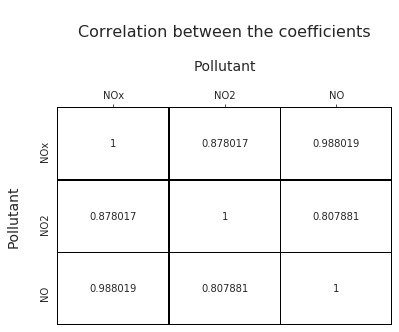

In [1144]:
corr = clean_bristol_exp[['NOx', 'NO2', 'NO']].corr()
with sns.axes_style('white'):
    ax = sns.heatmap(corr, annot=True, cbar=False,
                square=False,
                fmt='g',
                cmap=['white'],
                linecolor='black',
                linewidths=0.5)
    ax.set_title('\nCorrelation between the coefficients\n', fontsize=16)
    ax.set_ylabel('Pollutant\n', fontsize=14)
    ax.set_xlabel('Pollutant\n', fontsize=14)
    ax.xaxis.set_ticks_position('top')
    ax.xaxis.set_label_position('top')

In [1707]:
# data2 = {'SiteID':[0,1,2,3,4,5,6,7,8], 'Negative (%)':total_negative[0:9],
#        'Missing (%)':total_missing[0:9], 'Total Samples':total_sampless[0:9]} 

# df2 = pd.DataFrame(data2, index=[0,1,2,3,4,5,6,7,8]) 
  
# # Print the output.  9,10,11,12,13,14,15,16,17]
# df2.to_latex(index=False)

# with open('mytable2.tex', 'w') as tf:
#      tf.write(df2.to_latex(index=False))

data4 = {'NOx':[1, 0.878, 0.988], 'NO2':[0.878, 1, 0.808], 'NO':[0.988, 0.808, 1]}

df4 = pd.DataFrame(data4, index=['NOx', 'NO2', 'NO'])

with open('mytable4.tex', 'w') as tf:
    tf.write(df4.to_latex())
    
df4

,NOx,NO2,NO
NOx,1.000,0.878,0.988
NO2,0.878,1.000,0.808
NO,0.988,0.808,1.000


**[4.5] (2 points) Comment on the level of correlation between each pair of pollutants.**

The highest correlation is between NOx and NO, with a coefficient of 0.988. This is followed by the correlation of NOx and NO2, with a coefficient of 0.878. The lowest correlation is between NO2 and NO, with a coefficient of 0.808. Overall, I can observe that the pollutants have a strong positive correlation with each other.

**Another interesting analysis is to look at the correlations betweens sites. To help you with
this, we have again preprocessed the data and provided you with a new dataset in which
the data is organised in individual columns per-site, thus aligning together readings from
the same time-point. We also only kept columns for which we have a significant number
of overlapping time-points, i.e. for sites 1, 2, 4, 6, 7, 10, 12, 14, 16 and 17. Load the file
BristolAir_SiteAligned.csv.**

**Note that the first two lines are header rows (Pollutant
and SiteID respectively) and hence you need to set header=[0, 1] : also remember to
enforce compression=`bz2' . Finally, the first column is the time/date of the reading
( Hint: tell pandas about this by setting parse_dates=[0] ). Explore the data and its
structure and then answer the following questions.**

**[4.6] (5 points) For each of the three pollutants, compute the Pearson correlation between
sites. Hint: You will need to remove the `Date Time' column and then group by the first
level of the columns. Then plot these as three heatmaps: show the values within the
figures. Hint: Use the method plot_matrix() from mpctools.extensions.mplext.**

In [83]:
bristol_aligned_loc = os.path.join(os.getcwd(), 'Data', 'PartB', 'BristolAir_SiteAligned.csv')
bristol_aligned = pd.read_csv(bristol_aligned_loc, delimiter=',', compression='bz2', header=[0,1], 
                              parse_dates=[0])

In [84]:
bristol_aligned

Date Time    NOx                                        \
             Unnamed: 0_level_1      1       2       4       6     7      10   
0     2009-03-14 04:00:00+00:00  10.50   15.25   21.50   23.75   8.0   53.25   
1     2009-03-14 05:00:00+00:00   9.75    9.50   11.50   23.25  10.0   30.50   
2     2009-03-15 17:00:00+00:00  67.25   88.75   66.00  163.75  36.0  203.75   
3     2009-03-17 13:00:00+00:00  71.75  124.50  135.00   96.50  38.0  172.50   
4     2009-03-17 15:00:00+00:00  82.00  125.00  104.25  106.50  36.0  193.00   
...                         ...    ...     ...     ...     ...   ...     ...   
14890 2012-03-25 10:00:00+00:00  53.00   67.25  143.50  123.25  29.0   86.75   
14891 2012-03-25 11:00:00+00:00  29.50   42.50   81.00   75.75  36.0   87.25   
14892 2012-03-25 12:00:00+00:00  25.75   44.75   88.25   46.25  27.0  102.00   
14893 2012-03-25 13:00:00+00:00  40.75   46.75   80.50   69.50  17.0   68.00   
14894 2012-03-25 14:00:00+00:00  19.00   37.00   70.25   33.50  15.0   79.75   

                              ...     NO                                   \
          12      14      16  ...      1      2      4      6    7     10   
0       19.0  201.75   40.00  ...   2.75   2.25   4.00   8.75  0.0  12.50   
1       19.0  138.00   42.00  ...   3.00   2.75   3.00   8.50  0.0   5.75   
2      155.0  429.00   94.00  ...  18.25  27.00  16.50  57.25  3.0  69.75   
3      338.0  734.00  196.50  ...  17.75  53.25  46.25  34.75  6.0  61.50   
4      321.0  679.00  329.00  ...  21.50  47.50  34.25  36.50  5.0  63.75   
...      ...     ...     ...  ...    ...    ...    ...    ...  ...    ...   
14890  166.0  219.75  129.25  ...  12.00  25.50  55.25  52.25  4.0  26.25   
14891  168.0  171.75   91.75  ...   5.00  11.50  25.50  30.75  7.0  27.00   
14892  164.0  167.00   90.25  ...   4.25  14.25  29.25  18.25  5.0  33.25   
14893  138.0  167.25  100.75  ...   8.75  14.50  25.25  29.00  2.0  19.75   
14894  111.0  186.25   65.50  ...   3.25   9.75  23.00  12.00  1.0  23.75   

                                     
          12      14      16     17  
0        3.0   64.75   12.50   2.50  
1        3.0   38.50   12.25   2.25  
2       51.0  177.00   21.50  28.50  
3      139.0  345.50   71.00  47.00  
4      130.0  305.25  134.25  45.50  
...      ...     ...     ...    ...  
14890   60.0   98.75   43.00  38.00  
14891   60.0   69.50   25.50  22.00  
14892   61.0   72.25   26.25  33.25  
14893   47.0   71.25   31.50  33.25  
14894   36.0   79.50   16.50  22.25  

[14895 rows x 31 columns]

In [85]:
bristol_aligned.columns._levels[1]

Index(['1', '10', '12', '14', '16', '17', '2', '4', '6', '7',
       'Unnamed: 0_level_1'],
      dtype='object')

In [134]:
bristol_aligned.shape

(14895, 31)

In [86]:
ids = bristol_aligned.columns.get_level_values(1)
ids

Index(['Unnamed: 0_level_1', '1', '2', '4', '6', '7', '10', '12', '14', '16',
       '17', '1', '2', '4', '6', '7', '10', '12', '14', '16', '17', '1', '2',
       '4', '6', '7', '10', '12', '14', '16', '17'],
      dtype='object')

In [87]:
bristol_aligned.columns._levels[0]

Index(['Date Time', 'NO', 'NO2', 'NOx'], dtype='object')

In [88]:
pd.parse_dates=[0]

In [89]:
bristol_aligned_wo_dates = bristol_aligned.drop('Date Time', axis=1)

/Users/athiyadeviyani/miniconda3/envs/iamlassignment2/lib/python3.6/site-packages/pandas/core/generic.py:3947: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_axis = axis.drop(labels, errors=errors)


In [90]:
NOx = bristol_aligned_wo_dates[bristol_aligned_wo_dates.columns[range(10)]]
TOTAL_NOX = []
todo = [0,1,2,3,4,5,6,7,8,9]
pearsonr(NOx[NOx.columns[0]],NOx[NOx.columns[1]])
count = 0
for i in range(10):
    for j in todo:
        if i!=j:
            pearson = pearsonr(NOx[NOx.columns[i]],NOx[NOx.columns[j]])
            TOTAL_NOX.append(pearson[0])
            print(NOx.columns[i], NOx.columns[j], pearson)
            count += 1
    todo.remove(i)
    print(todo)
    
print('total number of comparisons: ' + str(count))
print(TOTAL_NOX)

('NOx', '1') ('NOx', '2') (0.7909517554084643, 0.0)
('NOx', '1') ('NOx', '4') (0.7684835373886447, 0.0)
('NOx', '1') ('NOx', '6') (0.6725274894387667, 0.0)
('NOx', '1') ('NOx', '7') (0.7151043364528212, 0.0)
('NOx', '1') ('NOx', '10') (0.7498195535664959, 0.0)
('NOx', '1') ('NOx', '12') (0.6181067515472527, 0.0)
('NOx', '1') ('NOx', '14') (0.6215789644263103, 0.0)
('NOx', '1') ('NOx', '16') (0.7907940833529215, 0.0)
('NOx', '1') ('NOx', '17') (0.7414681753134473, 0.0)
[1, 2, 3, 4, 5, 6, 7, 8, 9]
('NOx', '2') ('NOx', '4') (0.7038639462319269, 0.0)
('NOx', '2') ('NOx', '6') (0.5993813021769814, 0.0)
('NOx', '2') ('NOx', '7') (0.6265901919161403, 0.0)
('NOx', '2') ('NOx', '10') (0.7515280024545796, 0.0)
('NOx', '2') ('NOx', '12') (0.6564675212455062, 0.0)
('NOx', '2') ('NOx', '14') (0.6909483210376623, 0.0)
('NOx', '2') ('NOx', '16') (0.8023391703121654, 0.0)
('NOx', '2') ('NOx', '17') (0.7387540766735503, 0.0)
[2, 3, 4, 5, 6, 7, 8, 9]
('NOx', '4') ('NOx', '6') (0.5854196284160459, 0.0)
(

In [387]:
NOx

NOx                                                               \
           1       2       4       6     7      10     12      14      16   
0      10.50   15.25   21.50   23.75   8.0   53.25   19.0  201.75   40.00   
1       9.75    9.50   11.50   23.25  10.0   30.50   19.0  138.00   42.00   
2      67.25   88.75   66.00  163.75  36.0  203.75  155.0  429.00   94.00   
3      71.75  124.50  135.00   96.50  38.0  172.50  338.0  734.00  196.50   
4      82.00  125.00  104.25  106.50  36.0  193.00  321.0  679.00  329.00   
...      ...     ...     ...     ...   ...     ...    ...     ...     ...   
14890  53.00   67.25  143.50  123.25  29.0   86.75  166.0  219.75  129.25   
14891  29.50   42.50   81.00   75.75  36.0   87.25  168.0  171.75   91.75   
14892  25.75   44.75   88.25   46.25  27.0  102.00  164.0  167.00   90.25   
14893  40.75   46.75   80.50   69.50  17.0   68.00  138.0  167.25  100.75   
14894  19.00   37.00   70.25   33.50  15.0   79.75  111.0  186.25   65.50   

               
           17  
0       41.00  
1       37.00  
2      127.25  
3      150.50  
4      151.25  
...       ...  
14890  104.25  
14891   73.50  
14892   94.75  
14893   89.50  
14894   65.75  

[14895 rows x 10 columns]

In [141]:
NO2 = bristol_aligned_wo_dates[bristol_aligned_wo_dates.columns[range(10,20)]]

todo = [0,1,2,3,4,5,6,7,8,9]
pearsonr(NO2[NO2.columns[0]],NO2[NO2.columns[1]])
count = 0

TOTAL_NO2 = []
for i in range(10):
    for j in todo:
        if i!=j:
            pearson = pearsonr(NO2[NO2.columns[i]],NO2[NO2.columns[j]])
            TOTAL_NO2.append(pearson[0])
            print(NO2.columns[i], NO2.columns[j])
            count += 1
    todo.remove(i)
    print(todo)
    
print('total number of comparisons: ' + str(count))
print(TOTAL_NO2)

('NO2', '1') ('NO2', '2')
('NO2', '1') ('NO2', '4')
('NO2', '1') ('NO2', '6')
('NO2', '1') ('NO2', '7')
('NO2', '1') ('NO2', '10')
('NO2', '1') ('NO2', '12')
('NO2', '1') ('NO2', '14')
('NO2', '1') ('NO2', '16')
('NO2', '1') ('NO2', '17')
[1, 2, 3, 4, 5, 6, 7, 8, 9]
('NO2', '2') ('NO2', '4')
('NO2', '2') ('NO2', '6')
('NO2', '2') ('NO2', '7')
('NO2', '2') ('NO2', '10')
('NO2', '2') ('NO2', '12')
('NO2', '2') ('NO2', '14')
('NO2', '2') ('NO2', '16')
('NO2', '2') ('NO2', '17')
[2, 3, 4, 5, 6, 7, 8, 9]
('NO2', '4') ('NO2', '6')
('NO2', '4') ('NO2', '7')
('NO2', '4') ('NO2', '10')
('NO2', '4') ('NO2', '12')
('NO2', '4') ('NO2', '14')
('NO2', '4') ('NO2', '16')
('NO2', '4') ('NO2', '17')
[3, 4, 5, 6, 7, 8, 9]
('NO2', '6') ('NO2', '7')
('NO2', '6') ('NO2', '10')
('NO2', '6') ('NO2', '12')
('NO2', '6') ('NO2', '14')
('NO2', '6') ('NO2', '16')
('NO2', '6') ('NO2', '17')
[4, 5, 6, 7, 8, 9]
('NO2', '7') ('NO2', '10')
('NO2', '7') ('NO2', '12')
('NO2', '7') ('NO2', '14')
('NO2', '7') ('NO2', '16'

In [142]:
NO = bristol_aligned_wo_dates[bristol_aligned_wo_dates.columns[range(20,30)]]

TOTAL_NO = []
todo = [0,1,2,3,4,5,6,7,8,9]
pearsonr(NO[NO.columns[0]],NO[NO.columns[1]])
count = 0
for i in range(10):
    for j in todo:
        if i!=j:
            pearson = pearsonr(NO[NO.columns[i]],NO[NO.columns[j]])
            TOTAL_NO.append(pearson[0])
            print(NO.columns[i], NO.columns[j], pearson)
            count += 1
    todo.remove(i)
    print(todo)
    
print('total number of comparisons: ' + str(count))
print(TOTAL_NO)

('NO', '1') ('NO', '2') (0.7858706862167761, 0.0)
('NO', '1') ('NO', '4') (0.7549304105905058, 0.0)
('NO', '1') ('NO', '6') (0.674171545681488, 0.0)
('NO', '1') ('NO', '7') (0.6921045067941759, 0.0)
('NO', '1') ('NO', '10') (0.7433167967820195, 0.0)
('NO', '1') ('NO', '12') (0.6090396961875528, 0.0)
('NO', '1') ('NO', '14') (0.5807467539667147, 0.0)
('NO', '1') ('NO', '16') (0.7785561922289009, 0.0)
('NO', '1') ('NO', '17') (0.7162189560575017, 0.0)
[1, 2, 3, 4, 5, 6, 7, 8, 9]
('NO', '2') ('NO', '4') (0.6840484066541318, 0.0)
('NO', '2') ('NO', '6') (0.5882512267462361, 0.0)
('NO', '2') ('NO', '7') (0.6268575489957042, 0.0)
('NO', '2') ('NO', '10') (0.7545392586607693, 0.0)
('NO', '2') ('NO', '12') (0.65095089324573, 0.0)
('NO', '2') ('NO', '14') (0.6487080484589389, 0.0)
('NO', '2') ('NO', '16') (0.793188728154123, 0.0)
('NO', '2') ('NO', '17') (0.7296256137356485, 0.0)
[2, 3, 4, 5, 6, 7, 8, 9]
('NO', '4') ('NO', '6') (0.5899042104421451, 0.0)
('NO', '4') ('NO', '7') (0.52418590814880

In [95]:
from mpctools.extensions.mplext import plot_matrix

In [270]:
totals = [TOTAL_NOX, TOTAL_NO2, TOTAL_NO]
np.array(totals)

n = np.array(totals)
n.shape

(3, 45)

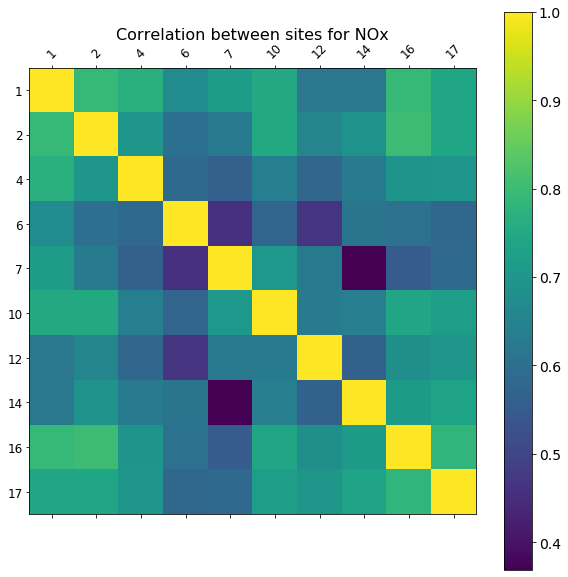

In [151]:
f = plt.figure(figsize=(10, 10))
corr = NOx.corr()
plt.matshow(corr, fignum=f.number)
plt.xticks(range(NOx.shape[1]), [1,2,4,6,7,10,12,14,16,17], fontsize=12, rotation=45)
plt.yticks(range(NOx.shape[1]), [1,2,4,6,7,10,12,14,16,17], fontsize=12)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation between sites for NOx', fontsize=16)

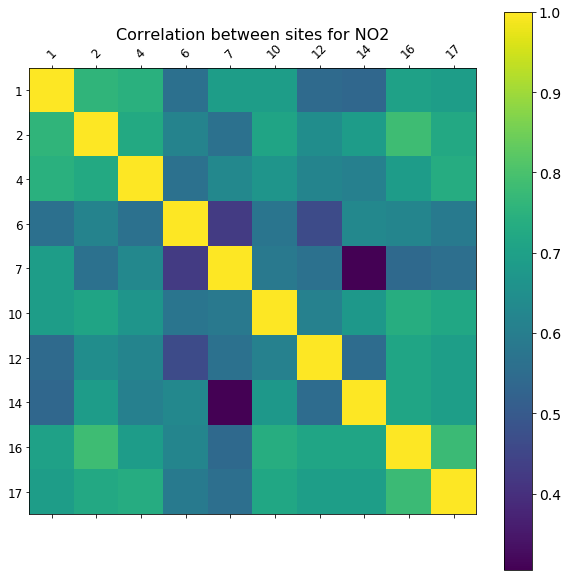

In [146]:
f = plt.figure(figsize=(10, 10))
plt.matshow(NO2.corr(), fignum=f.number)
plt.xticks(range(NO2.shape[1]), [1,2,4,6,7,10,12,14,16,17], fontsize=12, rotation=45)
plt.yticks(range(NO2.shape[1]), [1,2,4,6,7,10,12,14,16,17], fontsize=12)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation between sites for NO2', fontsize=16);

Text(0.5, 1.05, 'Correlation between sites for NO')

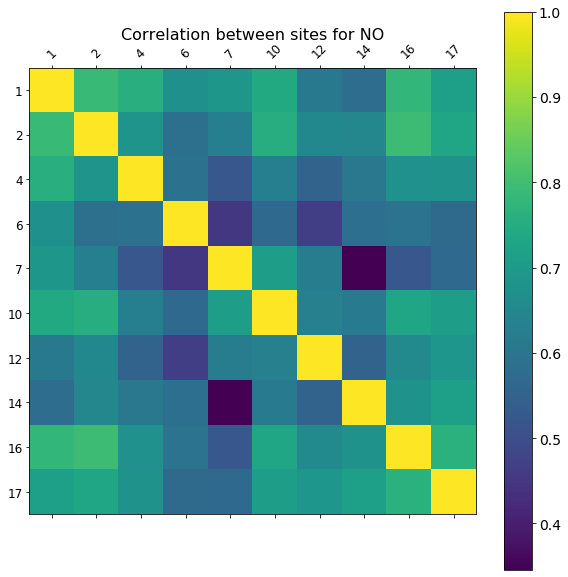

In [166]:
f = plt.figure(figsize=(10, 10))
plt.matshow(NO.corr(), fignum=f.number)
plt.xticks(range(NO.shape[1]), [1,2,4,6,7,10,12,14,16,17], fontsize=12, rotation=45)
plt.yticks(range(NO.shape[1]), [1,2,4,6,7,10,12,14,16,17], fontsize=12)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation between sites for NO', fontsize=16)

Text(0.5, 1.05, 'Correlation between sites for NO')

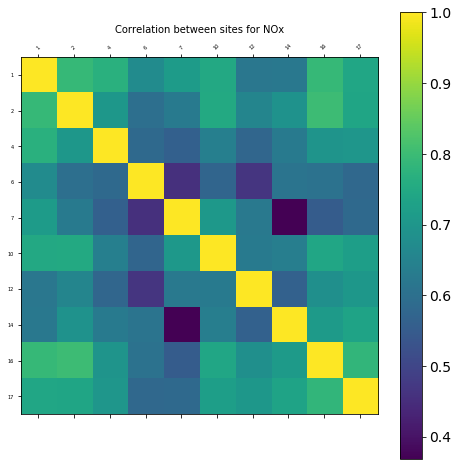

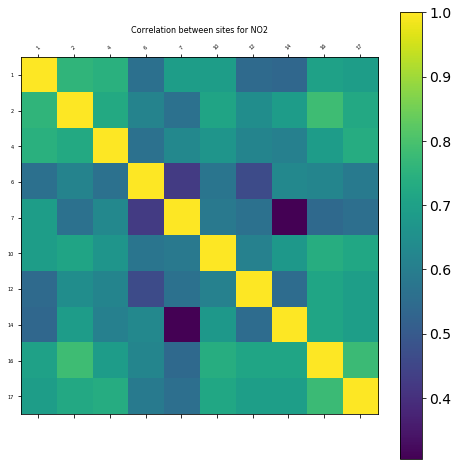

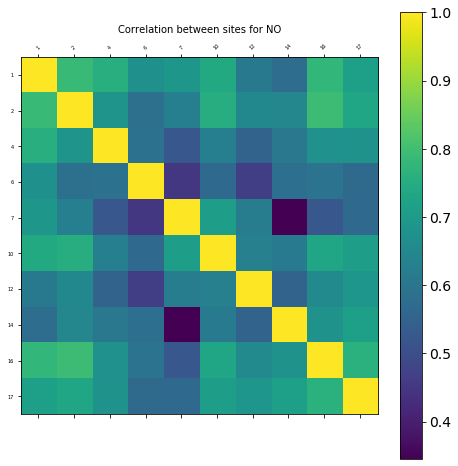

In [164]:

f = plt.figure(figsize=(8, 8))
corr = NOx.corr()
plt.matshow(corr, fignum=f.number)
plt.xticks(range(NOx.shape[1]), [1,2,4,6,7,10,12,14,16,17], fontsize=5, rotation=45)
plt.yticks(range(NOx.shape[1]), [1,2,4,6,7,10,12,14,16,17], fontsize=5)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation between sites for NOx', fontsize=10)


f = plt.figure(figsize=(8, 8))
corr = NO2.corr()
plt.matshow(corr, fignum=f.number)
plt.xticks(range(NO2.shape[1]), [1,2,4,6,7,10,12,14,16,17], fontsize=5, rotation=45)
plt.yticks(range(NO2.shape[1]), [1,2,4,6,7,10,12,14,16,17], fontsize=5)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation between sites for NO2', fontsize=8)


f = plt.figure(figsize=(8, 8))
corr = NO.corr()
plt.matshow(corr, fignum=f.number)
plt.xticks(range(NO.shape[1]), [1,2,4,6,7,10,12,14,16,17], fontsize=5, rotation=45)
plt.yticks(range(NO.shape[1]), [1,2,4,6,7,10,12,14,16,17], fontsize=5)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation between sites for NO', fontsize=10)


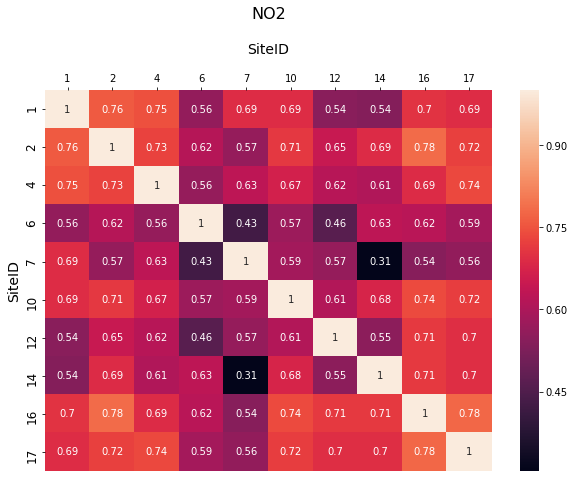

In [210]:
NO2 = bristol_aligned_wo_dates[bristol_aligned_wo_dates.columns[range(10,20)]]

plt.figure(figsize = (10,7))
plt.xticks([1,2,4,6,7,10,12,14,16,17], fontsize=12)
plt.yticks([1,2,4,6,7,10,12,14,16,17], fontsize=12)
ax = sns.heatmap(NO2.corr(method='pearson'), 
                xticklabels=[1,2,4,6,7,10,12,14,16,17], 
                yticklabels=[1,2,4,6,7,10,12,14,16,17], 
                annot=True)
ax.set_title('NO2\n', fontsize=16)
ax.set_ylabel('SiteID', fontsize=14)
ax.set_xlabel('SiteID\n', fontsize=14)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

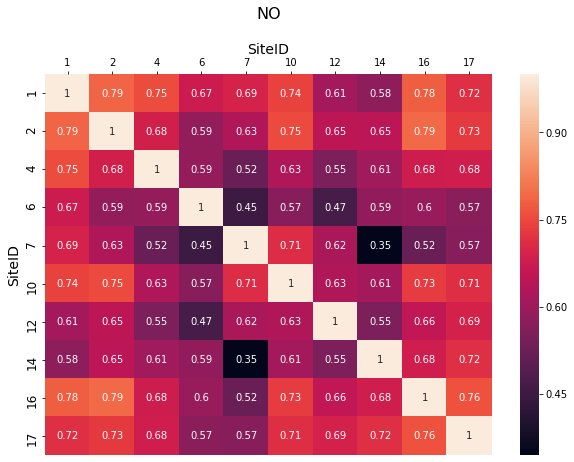

In [207]:
NO = bristol_aligned_wo_dates[bristol_aligned_wo_dates.columns[range(20,30)]]

plt.figure(figsize = (10,7))
plt.xticks([1,2,4,6,7,10,12,14,16,17], fontsize=12)
plt.yticks([1,2,4,6,7,10,12,14,16,17], fontsize=12)
ax = sns.heatmap(NO.corr(method='pearson'), 
                xticklabels=[1,2,4,6,7,10,12,14,16,17], 
                yticklabels=[1,2,4,6,7,10,12,14,16,17], 
                annot=True)
ax.set_title('NO\n', fontsize=16)
ax.set_ylabel('SiteID', fontsize=14)
ax.set_xlabel('SiteID', fontsize=14)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

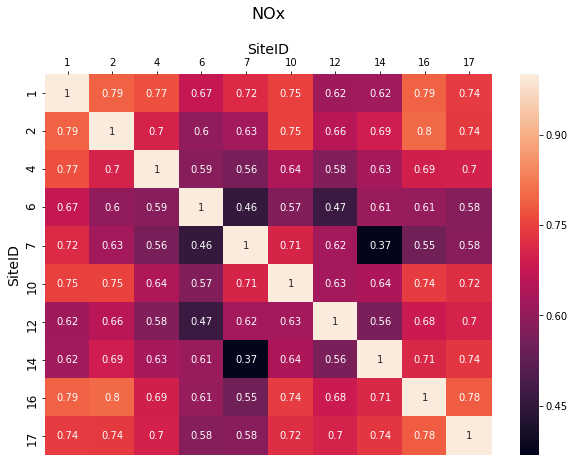

In [208]:
NOx = bristol_aligned_wo_dates[bristol_aligned_wo_dates.columns[range(10)]]


plt.figure(figsize = (10,7))
plt.xticks([1,2,4,6,7,10,12,14,16,17], fontsize=12)
plt.yticks([1,2,4,6,7,10,12,14,16,17], fontsize=12)
ax = sns.heatmap(NOx.corr(method='pearson'), 
                xticklabels=[1,2,4,6,7,10,12,14,16,17], 
                yticklabels=[1,2,4,6,7,10,12,14,16,17], 
                annot=True)
ax.set_title('NOx\n', fontsize=16)
ax.set_ylabel('SiteID', fontsize=14)
ax.set_xlabel('SiteID', fontsize=14)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

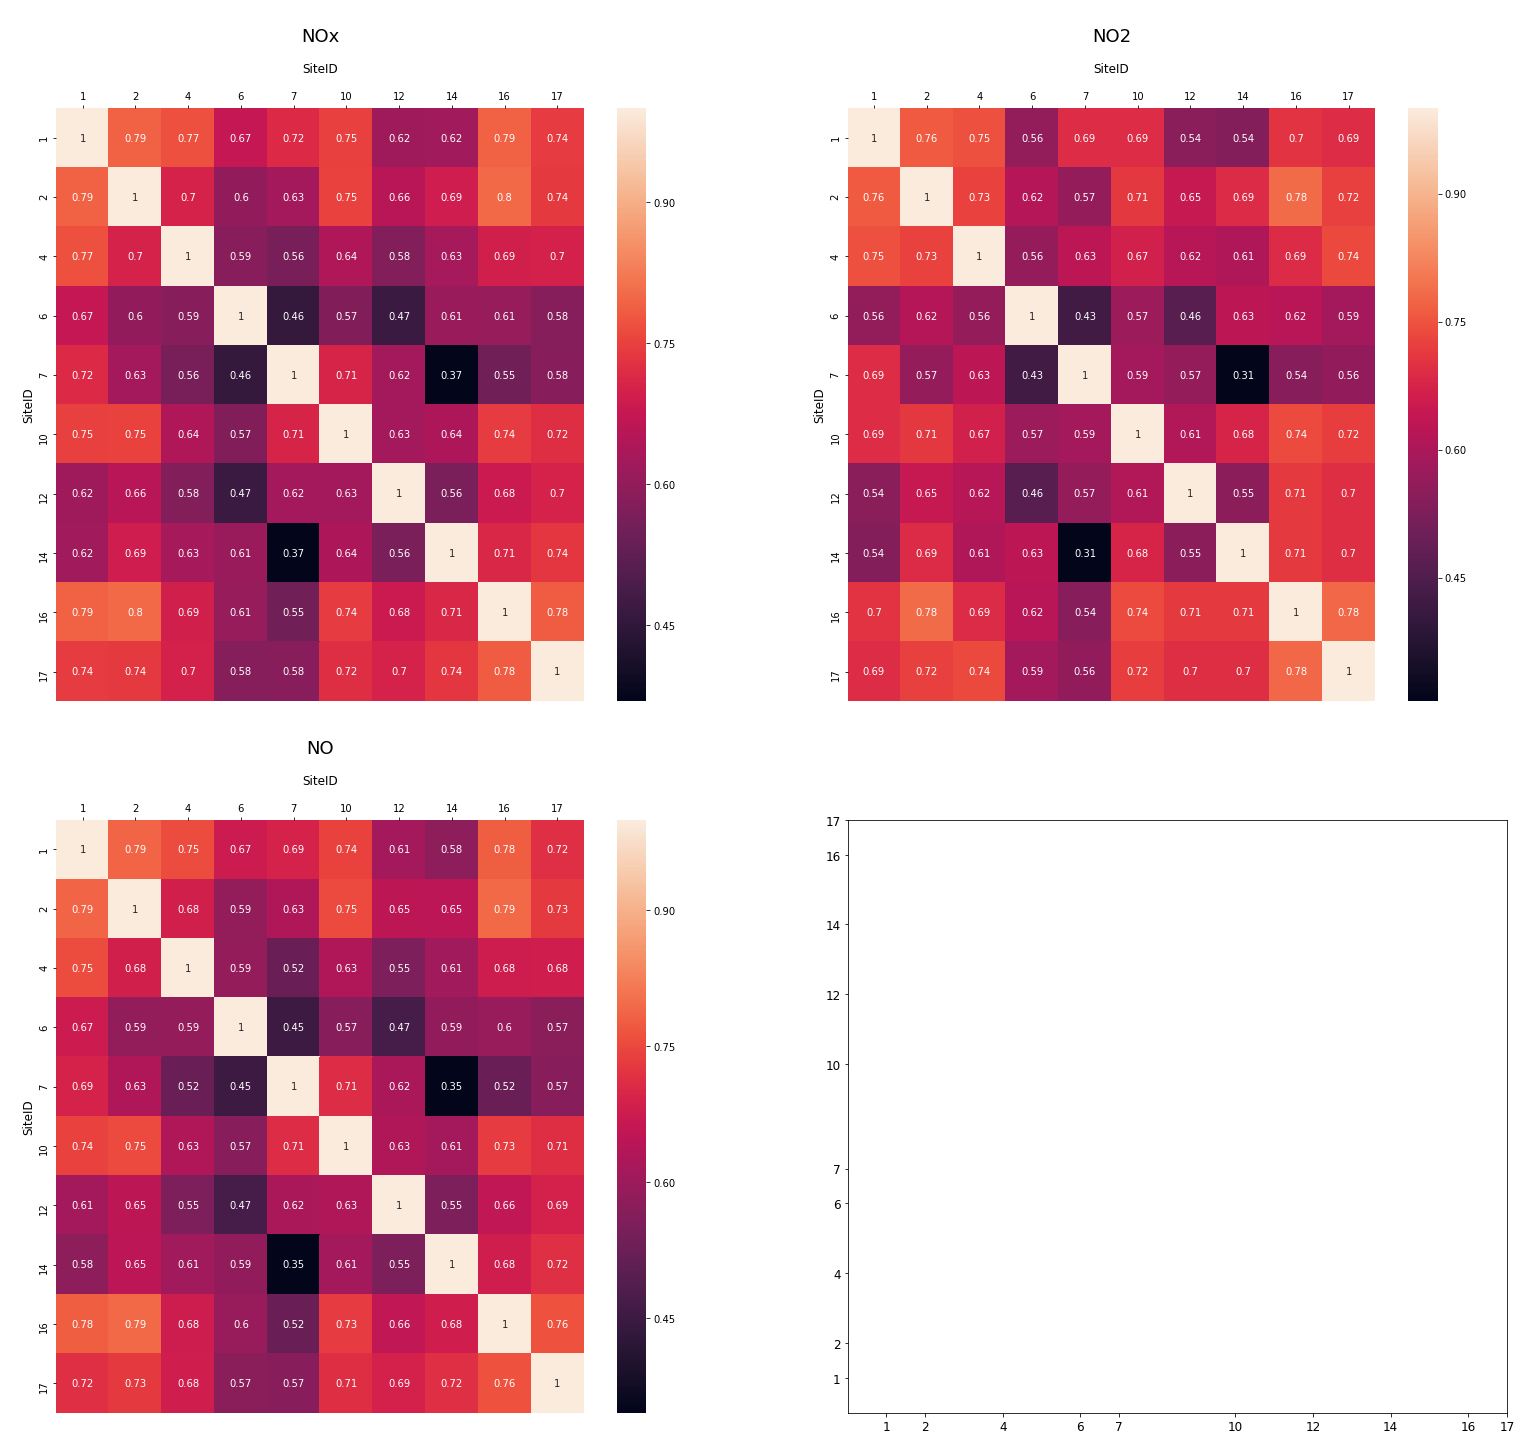

In [1745]:
_, axes = plt.subplots(2,2, figsize=(26,24))

plt.xticks([1,2,4,6,7,10,12,14,16,17], fontsize=12)
plt.yticks([1,2,4,6,7,10,12,14,16,17], fontsize=12)
ax = sns.heatmap(NOx.corr(method='pearson'), 
                xticklabels=[1,2,4,6,7,10,12,14,16,17], 
                yticklabels=[1,2,4,6,7,10,12,14,16,17], 
                annot=True,
                ax=axes[0,0])
ax.set_title('\nNOx', fontsize=18)
ax.set_ylabel('\nSiteID', fontsize=12)
ax.set_xlabel('\nSiteID\n', fontsize=12)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')


plt.xticks([1,2,4,6,7,10,12,14,16,17], fontsize=12)
plt.yticks([1,2,4,6,7,10,12,14,16,17], fontsize=12)
ax = sns.heatmap(NO2.corr(method='pearson'), 
                xticklabels=[1,2,4,6,7,10,12,14,16,17], 
                yticklabels=[1,2,4,6,7,10,12,14,16,17], 
                annot=True,
                ax=axes[0,1])
ax.set_title('\nNO2', fontsize=18)
ax.set_ylabel('\nSiteID', fontsize=12)
ax.set_xlabel('\nSiteID\n', fontsize=12)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')



plt.xticks([1,2,4,6,7,10,12,14,16,17], fontsize=12)
plt.yticks([1,2,4,6,7,10,12,14,16,17], fontsize=12)
ax = sns.heatmap(NO.corr(method='pearson'), 
                xticklabels=[1,2,4,6,7,10,12,14,16,17], 
                yticklabels=[1,2,4,6,7,10,12,14,16,17], 
                annot=True,
                ax=axes[1,0])
ax.set_title('\n\nNO', fontsize=18)
ax.set_ylabel('\nSiteID', fontsize=12)
ax.set_xlabel('\nSiteID\n', fontsize=12)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')



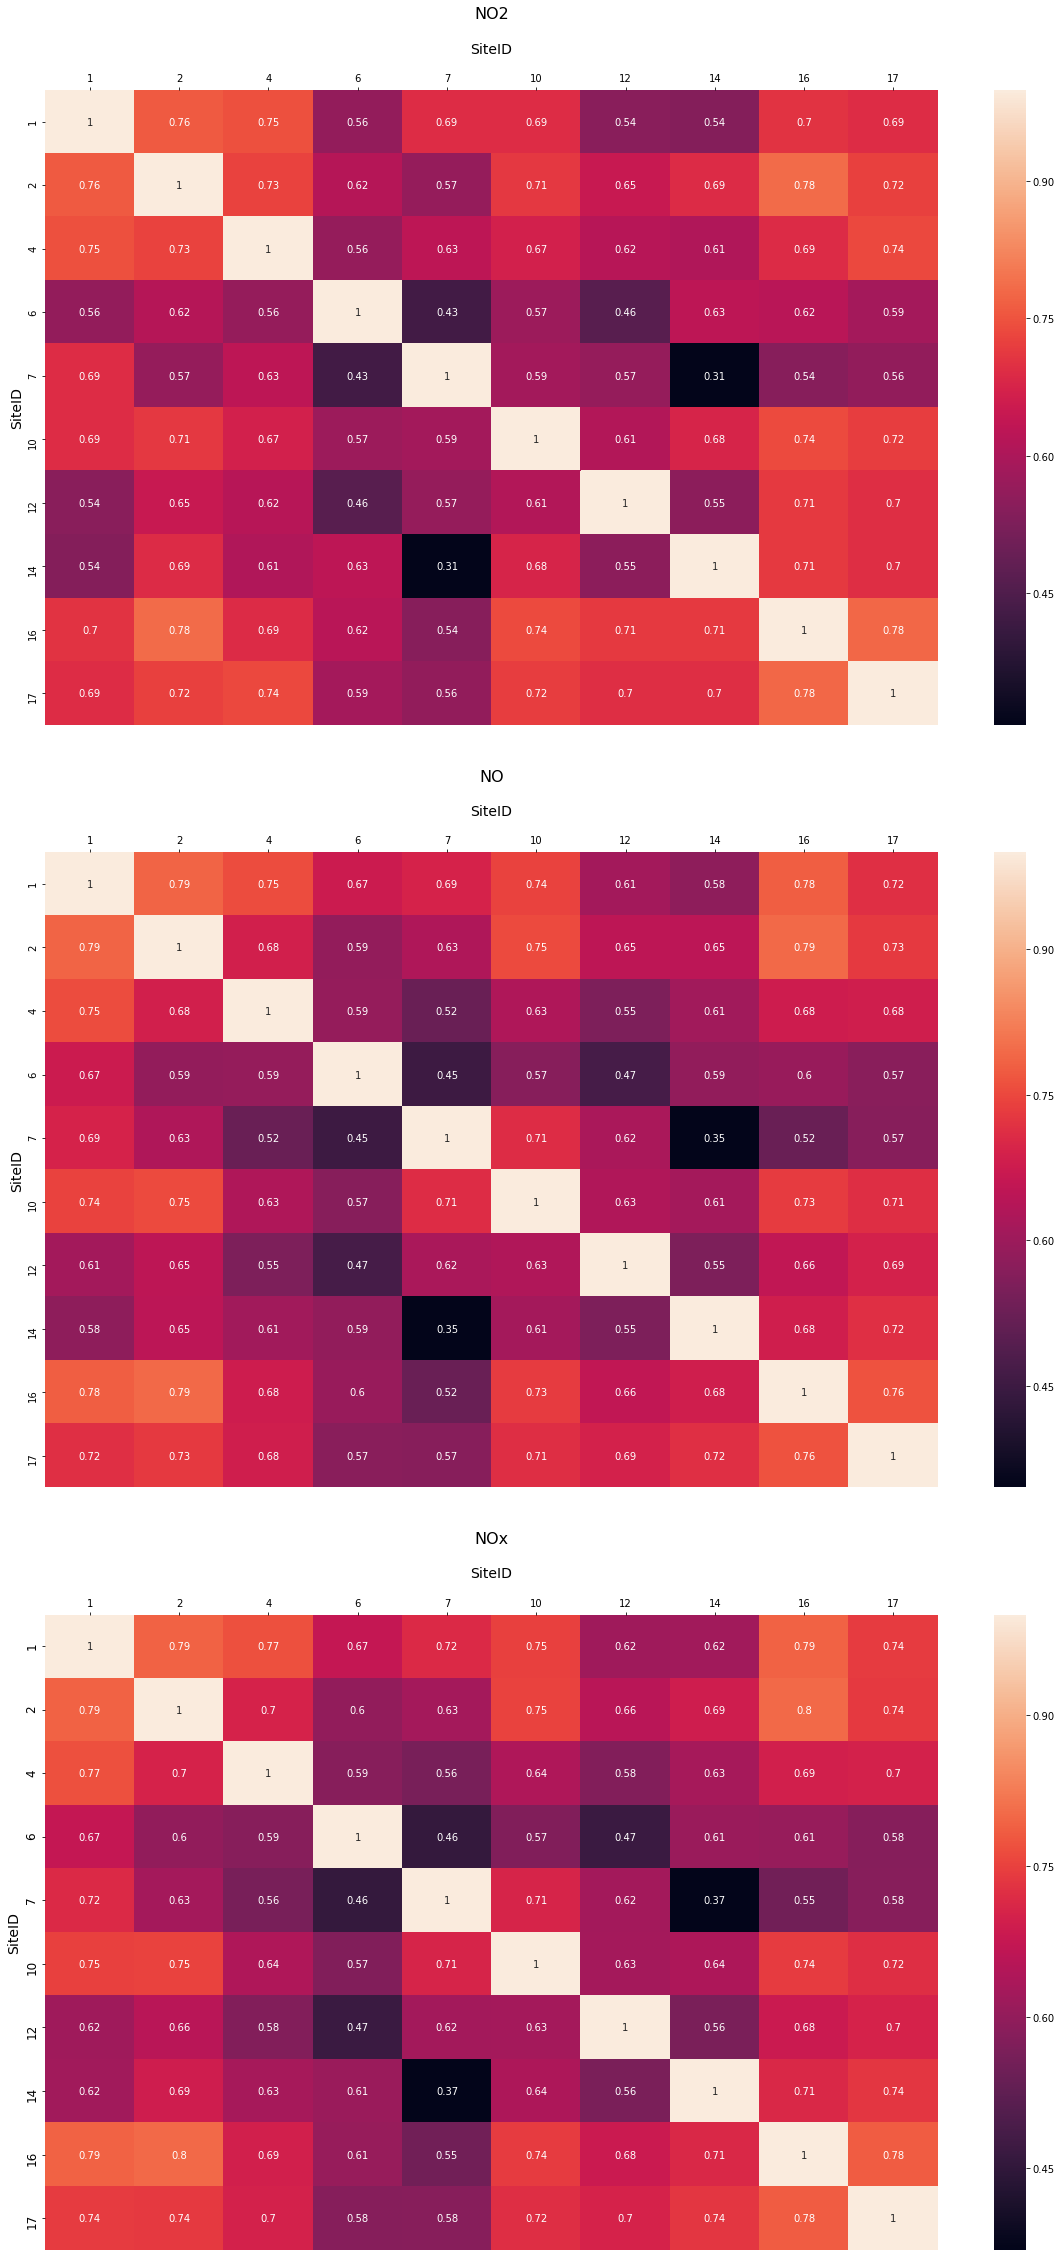

In [1528]:
_, axes = plt.subplots(3,1, figsize=(20,10))
plt.subplots_adjust(top=4.0, bottom=1.0)

plt.xticks([1,2,4,6,7,10,12,14,16,17], fontsize=12)
plt.yticks([1,2,4,6,7,10,12,14,16,17], fontsize=12)
ax = sns.heatmap(NO2.corr(method='pearson'), 
                xticklabels=[1,2,4,6,7,10,12,14,16,17], 
                yticklabels=[1,2,4,6,7,10,12,14,16,17], 
                annot=True,
                ax=axes[0])
ax.set_title('NO2\n', fontsize=16)
ax.set_ylabel('SiteID', fontsize=14)
ax.set_xlabel('SiteID\n', fontsize=14)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')




plt.xticks([1,2,4,6,7,10,12,14,16,17], fontsize=12)
plt.yticks([1,2,4,6,7,10,12,14,16,17], fontsize=12)
ax = sns.heatmap(NO.corr(method='pearson'), 
                xticklabels=[1,2,4,6,7,10,12,14,16,17], 
                yticklabels=[1,2,4,6,7,10,12,14,16,17], 
                annot=True,
                ax=axes[1])
ax.set_title('NO\n', fontsize=16)
ax.set_ylabel('SiteID', fontsize=14)
ax.set_xlabel('SiteID\n', fontsize=14)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')




plt.xticks([1,2,4,6,7,10,12,14,16,17], fontsize=12)
plt.yticks([1,2,4,6,7,10,12,14,16,17], fontsize=12)
ax = sns.heatmap(NOx.corr(method='pearson'), 
                xticklabels=[1,2,4,6,7,10,12,14,16,17], 
                yticklabels=[1,2,4,6,7,10,12,14,16,17], 
                annot=True,
                ax=axes[2])
ax.set_title('NOx\n', fontsize=16)
ax.set_ylabel('SiteID', fontsize=14)
ax.set_xlabel('SiteID\n', fontsize=14)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.show()

**[4.7] (4 points) Comment briefly on your observations from Question 4:(f): start by summarising the results from the NO gas and then comment on whether the same is observed
in the other gases or if there is something different.**

For NO gas, the highest correlation is between site 2 and 16 (0.79), followed by 1 and 16 (0.78), then 16 and 17 (0.76). The lowest correlation is between site 7 and 14 (0.35), followed by site 7 and 6 (0.45), then 6 and 12 (0.47). These trends are also spotted in NOx and NO2. In fact, the correlation between the sites for each pollutant varies very slightly, as the heatmap looks rather identical at first glance. The lowest correlation between sites can usually be found on NO2, and the highest correlation between sites can usually by found on NOx. 

# Question 5: (18 points) Principal Component Analysis

One aspect which we have not yet explored is the temporal nature of the data.
That is, we need to keep in mind that the readings have a temporal aspect to
them which can provide some interesting insight. We will explore this next.

We have provided you with a new version of the dataset, BristolAir_DayAligned.csv,
in which the data is organised by daily readings. That is the first two-columns indicate
the SiteID (for which we have selected a reduced subset to make the problem more man-
ageable), and the Date of the readings. The remaining 72 ( 24 × 3 ) columns (numbered
0 through 71) are the 24-hour readings for each of the 'NOx', 'NO2' and 'NO' pollutants
respectively.

Load the data into a pandas dataframe. Remember that the first line is
the header, and that the index columns should be 'SiteID' and 'Date': also, this is again
compressed using 'bz2'. Look at the first few lines and familiarise yourself with the data.

In [1356]:
bristol_dayaligned_loc = os.path.join(os.getcwd(), 'Data', 'PartB', 'BristolAir_DayAligned.csv')
bristol_dayaligned = pd.read_csv(bristol_dayaligned_loc, delimiter=',', compression='bz2', header=[0], index_col=[0,1])

In [1357]:
bristol_dayaligned

0          1          2          3           4  \
SiteID Date                                                                 
1      2004-07-02  25.250000  18.000000  12.500000   9.250000    8.750000   
       2004-07-03  22.250000  21.000000  23.500000  33.750000   15.500000   
       2004-07-04  28.250000  22.250000  32.000000  34.500000   50.500000   
       2004-07-05  56.750000  62.500000  79.500000  78.500000  115.750000   
       2004-07-06  94.250000  68.250000  44.500000  47.670000   31.750000   
...                      ...        ...        ...        ...         ...   
16     2019-08-04  30.360938  20.272500  16.638750  18.981563   25.914375   
       2019-08-06  12.144375   4.494375   5.115938   4.350938    7.124063   
       2019-08-08  12.096563   6.932813   9.180000  17.069063   39.062813   
       2019-08-10   3.107813   4.590000   3.681563   3.585938    4.159688   
       2019-08-11   6.502500   4.685625   2.438438   5.068125    3.681563   

                            5           6           7          8          9  \
SiteID Date                                                                   
1      2004-07-02   14.500000   18.500000   30.750000  35.250000  39.000000   
       2004-07-03    9.000000   14.000000   57.750000  49.750000  49.750000   
       2004-07-04   76.500000  165.750000  170.000000  63.250000  57.750000   
       2004-07-05  149.000000  175.000000  119.000000  83.750000  94.750000   
       2004-07-06   28.250000   31.750000   55.750000  41.000000  37.750000   
...                       ...         ...         ...        ...        ...   
16     2019-08-04   25.531875   37.867500   41.357812  30.313126  43.844062   
       2019-08-06   12.670313   34.233750   57.614063  63.973125  66.698439   
       2019-08-08   60.482812  111.833438  116.805937  91.799998  73.870312   
       2019-08-10    5.163750    8.558438    9.945000  10.710000  16.877813   
       2019-08-11    5.594063    4.159688    6.837188   7.171875   9.610313   

                   ...         62         63         64         65         66  \
SiteID Date        ...                                                          
1      2004-07-02  ...  14.250000  13.750000  12.000000  12.500000  10.750000   
       2004-07-03  ...  12.000000  10.250000  11.000000  14.750000  12.500000   
       2004-07-04  ...  19.250000  29.750000  17.500000  26.500000  18.250000   
       2004-07-05  ...  19.250000  23.500000  12.000000  15.500000  12.500000   
       2004-07-06  ...   3.250000   2.250000   3.000000   2.000000   2.000000   
...                ...        ...        ...        ...        ...        ...   
16     2019-08-04  ...  13.280550  19.359675  12.999975   9.383675  16.055125   
       2019-08-06  ...  24.441199  20.887250  40.215750  34.386025  20.357275   
       2019-08-08  ...  19.110275  23.724175  36.692976  35.414799  52.529875   
       2019-08-10  ...  15.899250  12.844100  11.752975  10.786550   9.788950   
       2019-08-11  ...  19.546725  14.683425   9.695425  11.098300  13.311725   

                          67         68         69         70         71  
SiteID Date                                                               
1      2004-07-02  10.500000   9.250000   9.000000   7.750000  10.750000  
       2004-07-03  11.500000   5.750000   8.250000   6.250000   1.250000  
       2004-07-04  18.750000  12.500000  14.000000  20.750000  26.000000  
       2004-07-05  13.500000  17.750000  38.000000  39.250000  21.500000  
       2004-07-06   1.000000   0.750000   0.750000   1.000000   0.250000  
...                      ...        ...        ...        ...        ...  
16     2019-08-04  14.278150  10.786550  12.189425   7.139075   5.673850  
       2019-08-06  18.954400  16.148650   8.666650   9.196625   3.148675  
       2019-08-08  34.292500  15.649850  10.350100  12.095900   6.047950  
       2019-08-10   8.011975   6.889675   4.426850   4.270975   2.774575  
       2019-08-11   9.009575   8.541950  22

In [1375]:
bristol_dayaligned.index

MultiIndex([( 1, '2004-07-02'),
            ( 1, '2004-07-03'),
            ( 1, '2004-07-04'),
            ( 1, '2004-07-05'),
            ( 1, '2004-07-06'),
            ( 1, '2004-07-08'),
            ( 1, '2004-07-09'),
            ( 1, '2004-07-10'),
            ( 1, '2004-07-11'),
            ( 1, '2004-07-12'),
            ...
            (16, '2019-07-26'),
            (16, '2019-07-27'),
            (16, '2019-07-28'),
            (16, '2019-07-31'),
            (16, '2019-08-03'),
            (16, '2019-08-04'),
            (16, '2019-08-06'),
            (16, '2019-08-08'),
            (16, '2019-08-10'),
            (16, '2019-08-11')],
           names=['SiteID', 'Date'], length=27217)

In [1358]:
headers = bristol_dayaligned.columns.values
headers

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
       '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
       '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67',
       '68', '69', '70', '71'], dtype=object)

In [1359]:
bristol_dayaligned.head(5).values[0]

array([25.25, 18.  , 12.5 ,  9.25,  8.75, 14.5 , 18.5 , 30.75, 35.25,
       39.  , 39.75, 32.75, 36.25, 34.75, 42.75, 38.  , 38.25, 29.5 ,
       31.  , 28.5 , 30.  , 30.75, 29.25, 37.25,  9.5 ,  6.25,  5.75,
        5.25,  3.25,  6.25,  7.  ,  9.75,  8.5 , 15.  , 14.25,  8.5 ,
        9.25,  9.75, 13.75, 10.75, 12.75,  7.  ,  9.5 ,  8.25, 10.75,
       11.  , 11.5 , 13.5 ,  7.  ,  5.25,  2.25,  1.25,  2.5 ,  3.  ,
        5.  , 10.25, 14.5 , 10.75, 11.5 , 13.25, 14.25, 12.75, 14.25,
       13.75, 12.  , 12.5 , 10.75, 10.5 ,  9.25,  9.  ,  7.75, 10.75])

**[5.1] (2 points) Plot the first 5 lines of data (plot ecah row as a single line-plot).**

Text(0.5, 1.0, 'Pollutant signals over 5 days')

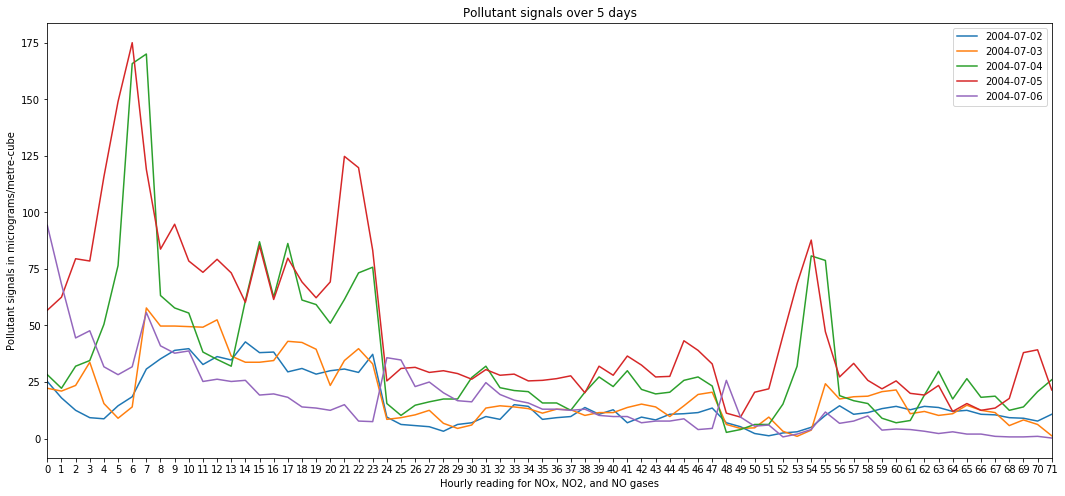

In [1376]:
ax = plt.figure(figsize=(18,8))
for i in range(0,5):
    #fig = plt.figure(figsize=(20,20))
    x = headers
    y = bristol_dayaligned.head(5).values[i]
    plt.plot(x,y, label=bristol_dayaligned.index[i][1])
    #plt.figure(figsize=(20,20))
plt.xlim(0,71)
plt.legend()
plt.xlabel('Hourly reading for NOx, NO2, and NO gases')
plt.ylabel('Pollutant signals in micrograms/metre-cube')plt.title('Pollutant signals over 5 days')

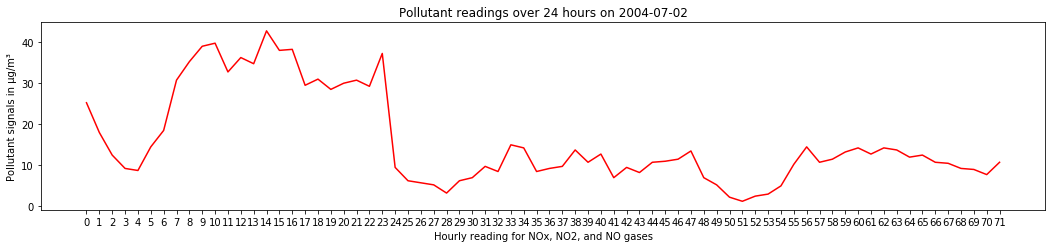

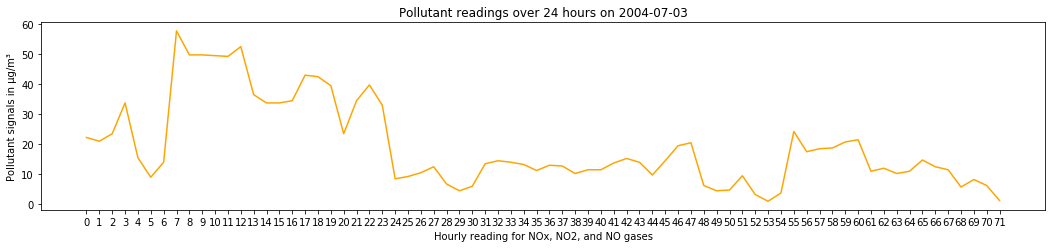

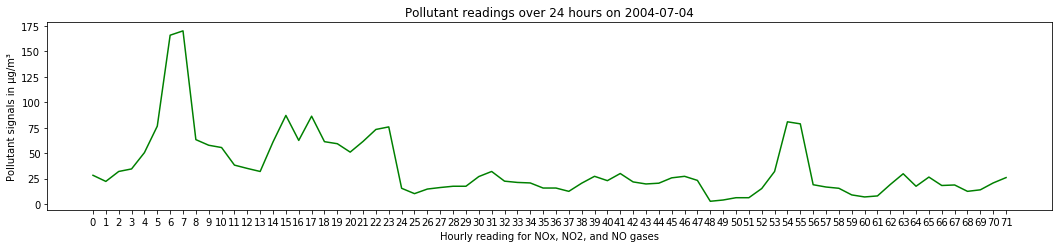

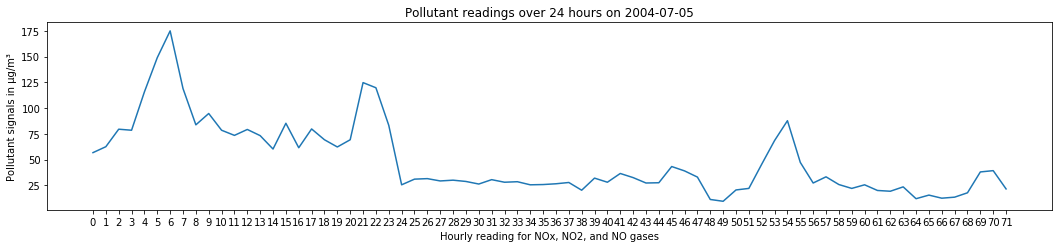

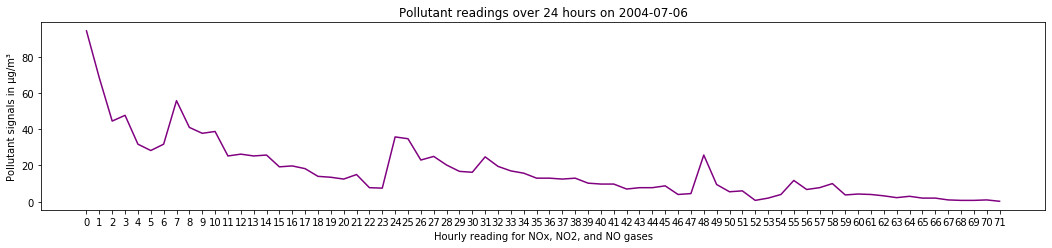

In [1765]:
color=['red','orange','green','C0','purple']
for i in range(0,5):   
    fig = plt.figure(figsize=(18,20))
    plt.subplot(5, 1, i+1)
    x = headers
    y = bristol_dayaligned.head(5).values[i]
    day = bristol_dayaligned.index[i][1]
    plt.title('Pollutant readings over 24 hours on ' + day)
    plt.xlabel('Hourly reading for NOx, NO2, and NO gases')
    plt.ylabel('Pollutant signals in μg/m³')
    plt.plot(x,y, color=color[i])
    #plt.figure(figsize=(20,20))

**You may have noticed that it is very difficult to interpret the data in this manner, especially since there is also a lot of variation between different days. We will address this
by employing Principal Component Analysis (PCA), but in this case, we will do this to
capture the major sources of variability in the data and help us look at it in more detail.
Given that we know about the correlation in the data, we also expect that this will help
in dimensionality reduction.
(b) (5 points) We will focus first on data solely from Site 1. Extract the data from this site,
and run PCA with the number of components set to 72 for now. Set the random_state=0 .
On a single plot plot: (i) the percentage of the variance explained by each principal
component (as a bar-chart), (ii) the cumulative variance (line-plot) explained by the first
n components: ( Hint: you should use twinx() to make the plot fit ), and , (iii) mark the
point (number of components) which collectively explain at least 95% of the variance.
Hint: Number components starting from 1.**


**(5.2) (5 points) We will focus first on data solely from Site 1. Extract the data from this site, and run PCA with the number of components set to 72 for now. Set the random_state=0 . On a single plot plot: (i) the percentage of the variance explained by each principal component (as a bar-chart), (ii) the cumulative variance (line-plot) explained by the first n components: ( Hint: you should use twinx() to make the plot fit ), and , (iii) mark the point (number of components) which collectively explain at least 95% of the variance. Hint: Number components starting from 1.**

In [259]:
for key, item in bristol_dayaligned.groupby('SiteID'):
    if key == 1:
        ba_site1 = item

ba_site1

0          1          2          3           4  \
SiteID Date                                                                 
1      2004-07-02  25.250000  18.000000  12.500000   9.250000    8.750000   
       2004-07-03  22.250000  21.000000  23.500000  33.750000   15.500000   
       2004-07-04  28.250000  22.250000  32.000000  34.500000   50.500000   
       2004-07-05  56.750000  62.500000  79.500000  78.500000  115.750000   
       2004-07-06  94.250000  68.250000  44.500000  47.670000   31.750000   
...                      ...        ...        ...        ...         ...   
       2019-08-03  50.059687  42.266250  38.536875  19.507500   32.512500   
       2019-08-04  31.460626  25.627500  17.260312  21.659063   34.329375   
       2019-08-08  12.765938   5.594063   6.932813   5.928750   12.287813   
       2019-08-10   5.546250   3.346875   2.151563   3.968438    1.338750   
       2019-08-11   8.175938   5.450625   4.685625   3.585938    2.438438   

                            5           6           7          8          9  \
SiteID Date                                                                   
1      2004-07-02   14.500000   18.500000   30.750000  35.250000  39.000000   
       2004-07-03    9.000000   14.000000   57.750000  49.750000  49.750000   
       2004-07-04   76.500000  165.750000  170.000000  63.250000  57.750000   
       2004-07-05  149.000000  175.000000  119.000000  83.750000  94.750000   
       2004-07-06   28.250000   31.750000   55.750000  41.000000  37.750000   
...                       ...         ...         ...        ...        ...   
       2019-08-03   42.314063   28.926562   24.049688  28.878750  40.975313   
       2019-08-04   25.197188   37.293750   23.141250  21.133125  27.874687   
       2019-08-08   37.198125   63.877499   62.060626  72.101250  33.994688   
       2019-08-10    3.729375    5.355000    7.410938   9.180000  11.235938   
       2019-08-11    2.725313    3.825000    5.020313   8.128125   8.510625   

                   ...         62         63         64         65         66  \
SiteID Date        ...                                                          
1      2004-07-02  ...  14.250000  13.750000  12.000000  12.500000  10.750000   
       2004-07-03  ...  12.000000  10.250000  11.000000  14.750000  12.500000   
       2004-07-04  ...  19.250000  29.750000  17.500000  26.500000  18.250000   
       2004-07-05  ...  19.250000  23.500000  12.000000  15.500000  12.500000   
       2004-07-06  ...   3.250000   2.250000   3.000000   2.000000   2.000000   
...                ...        ...        ...        ...        ...        ...   
       2019-08-03  ...   6.577925   8.261375   9.788950   8.043150   5.580325   
       2019-08-04  ...   7.450825  12.781750  14.184625   9.882475   8.760175   
       2019-08-08  ...  14.589900  15.868075  11.254175   9.601900   6.172650   
       2019-08-10  ...   9.820125   7.949625   8.978400   7.139075  12.158250   
       2019-08-11  ...  13.436425   8.604300   8.791350   9.601900   8.386075   

                          67         68         69         70        71  
SiteID Date                                                              
1      2004-07-02  10.500000   9.250000   9.000000   7.750000  10.75000  
       2004-07-03  11.500000   5.750000   8.250000   6.250000   1.25000  
       2004-07-04  18.750000  12.500000  14.000000  20.750000  26.00000  
       2004-07-05  13.500000  17.750000  38.000000  39.250000  21.50000  
       2004-07-06   1.000000   0.750000   0.750000   1.000000   0.25000  
...                      ...        ...        ...        ...       ...  
       2019-08-03   6.328525   6.952025   8.199025   4.146275  10.03835  
       2019-08-04   9.976000   4.395675   5.767375   7.606700   4.80095  
       2019-08-08   5.923250   4.364500   3.086325   3.086325   3.11750  
       2019-08-10   7.762575   6.110300   3.741000   2.774575   3.05515  
       2019-08-11   8.354900   8.230200   8.978400  10.

In [1677]:
pca = PCA(n_components=72, random_state=0)
X_72d = pca.fit(ba_site1)

In [1681]:
pca.components_

array([[ 0.11215097,  0.09086027,  0.07897724, ...,  0.09595322,
         0.08818225,  0.07439665],
       [-0.04745149, -0.04101033, -0.04185256, ...,  0.14797048,
         0.13975352,  0.12080515],
       [-0.19095395, -0.1859719 , -0.17908057, ..., -0.08385727,
        -0.09104753, -0.0862    ],
       ...,
       [ 0.02664621, -0.02802437,  0.00656273, ...,  0.13253729,
        -0.16214182,  0.08104235],
       [ 0.10044223, -0.20216309,  0.14436606, ..., -0.00935585,
        -0.02066407,  0.02763263],
       [ 0.04970932, -0.14889214,  0.25371991, ...,  0.02012987,
        -0.00752746,  0.00293023]])

In [261]:
X_72d

PCA(copy=True, iterated_power='auto', n_components=72, random_state=0,
    svd_solver='auto', tol=0.0, whiten=False)

In [262]:
pca.get_covariance()

array([[3413.72265913, 2650.16899343, 2173.59701074, ...,  854.28469976,
         781.87795228,  657.49015955],
       [2650.16899343, 2345.87710801, 1938.96320686, ...,  695.72910387,
         645.84493055,  547.7185212 ],
       [2173.59701074, 1938.96320686, 1844.22030616, ...,  601.46864708,
         560.90296683,  482.79429961],
       ...,
       [ 854.28469976,  695.72910387,  601.46864708, ..., 1576.76629317,
        1401.86427721, 1172.49364215],
       [ 781.87795228,  645.84493055,  560.90296683, ..., 1401.86427721,
        1433.68585566, 1196.51872989],
       [ 657.49015955,  547.7185212 ,  482.79429961, ..., 1172.49364215,
        1196.51872989, 1155.78058281]])

In [263]:
pca.get_covariance().shape

(72, 72)

In [271]:
covariance = pca.get_covariance()

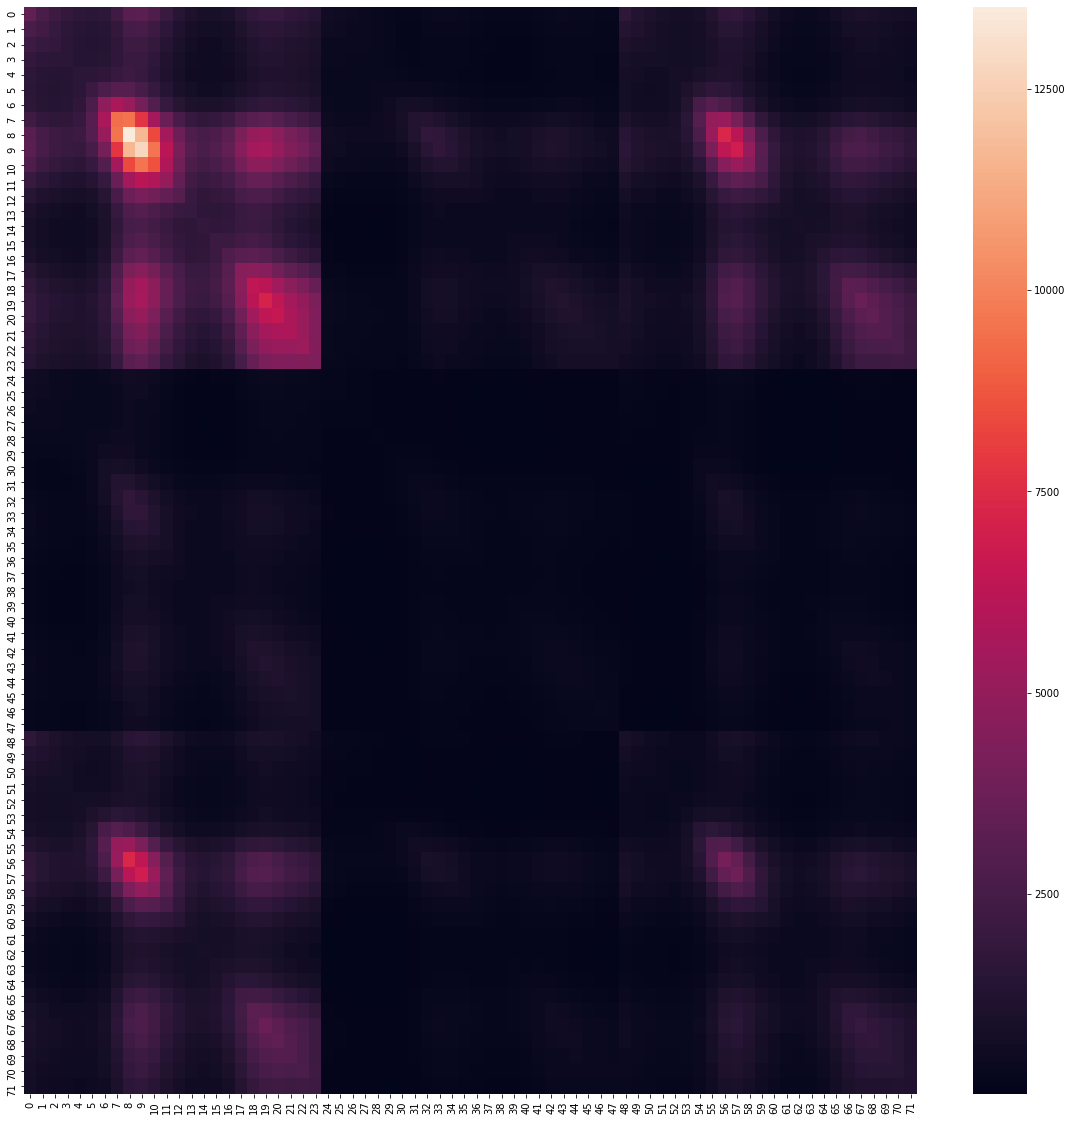

In [264]:
plt.figure(figsize=(20,20))
sns.heatmap(pca.get_covariance())

In [267]:
eigenvalues = pca.explained_variance_

In [268]:
eigenvectors = pca.components_

In [282]:
sum = 0
for eigenvalue, eigenvector in zip(eigenvalues, pca.components_):    
    #print(np.dot(eigenvector.T, np.dot(covariance, eigenvector)))
    print(eigenvalue/eigenvalues.sum())
    sum += eigenvalue/eigenvalues.sum()

0.5890059632999934
0.1382158245798255
0.06686952554007988
0.05216567555279415
0.03909321570578043
0.020504125382628587
0.014309072812949302
0.012223110756882765
0.009848130265079639
0.007530582365748833
0.006695948343110558
0.005636328357696671
0.004360976336388877
0.004110600113954924
0.00339117708473807
0.0027843039700889546
0.0024834662691538708
0.002264099963115907
0.002238217547027832
0.00197971454161588
0.0018631615332877197
0.0017908116187354446
0.0015842538453494464
0.001276455080213248
0.0012019589427259207
0.00109046357840519
0.0009933439114167223
0.0008142086951022507
0.0005932596811485305
0.0005803597688870863
0.00048935926920567
0.0002860089863544932
0.0002636539789105436
0.00018487612161079784
0.00015774360970591765
0.00013182806768354392
0.0001049275593262738
9.964494012272073e-05
7.962471490432364e-05
7.731787214752551e-05
6.937006563370093e-05
6.158996809359832e-05
5.776494675574791e-05
5.585696527726536e-05
5.405170751480672e-05
4.748168141600649e-05
4.622736223452067

In [280]:
sum

0.9999999999999997

<BarContainer object of 72 artists>

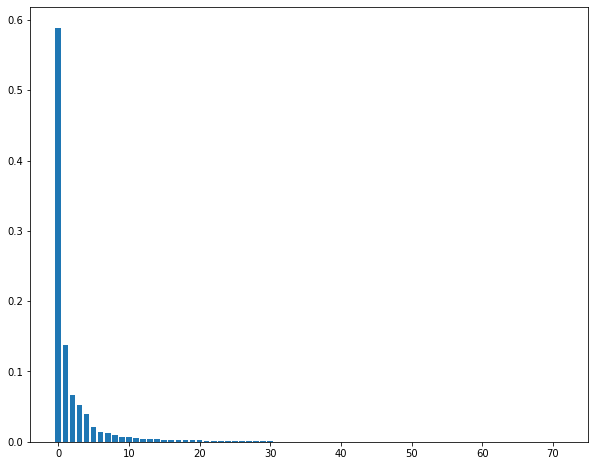

In [284]:
plt.figure(figsize=(10,8))
plt.bar(range(0,72), eigenvalues/eigenvalues.sum())
plt.title('Percentage of variance explained by each principal component', )

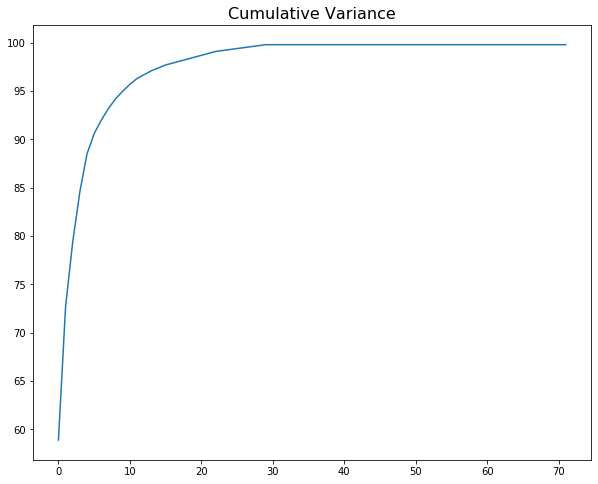

In [317]:
cumvar=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
cumvar=cumvar/100 #cumulative sum of variance explained with [n] features
plt.figure(figsize=(10,8))
plt.title('Cumulative Variance', fontsize=16)
plt.plot(cumvar)

Text(0, 0.5, 'Cumulative variance')

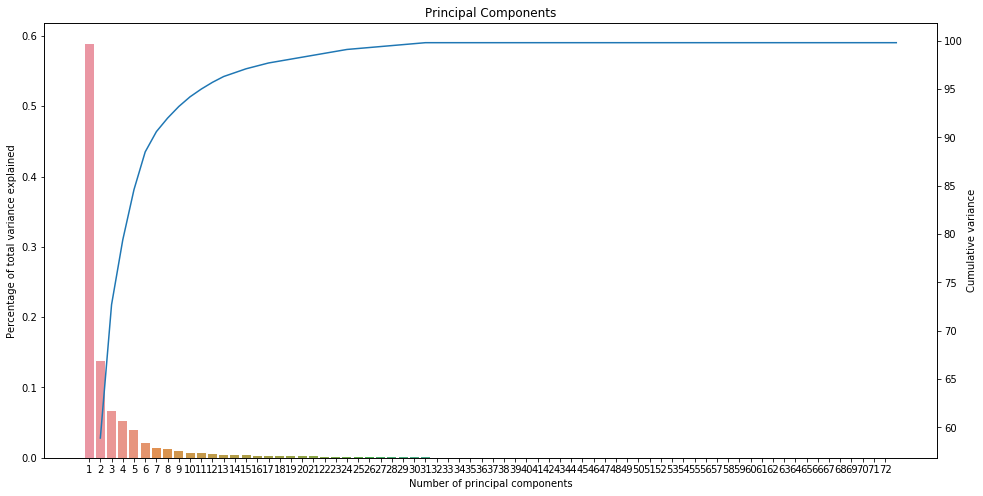

In [1497]:
plt.figure(figsize=(16, 8))
ax1 = sns.barplot(y=eigenvalues/eigenvalues.sum(), x=[i+1 for i in range(0,72)])
ax2 = ax1.twinx()
ax2 = sns.lineplot(y=cumvar, x=[i+1 for i in range(0,72)])

plt.title('Principal Components')
ax1.set_xlabel('Number of principal components')
ax1.set_ylabel('Percentage of total variance explained')
ax2.set_ylabel('Cumulative variance')

Text(0, 0.5, 'Cumulative variance')

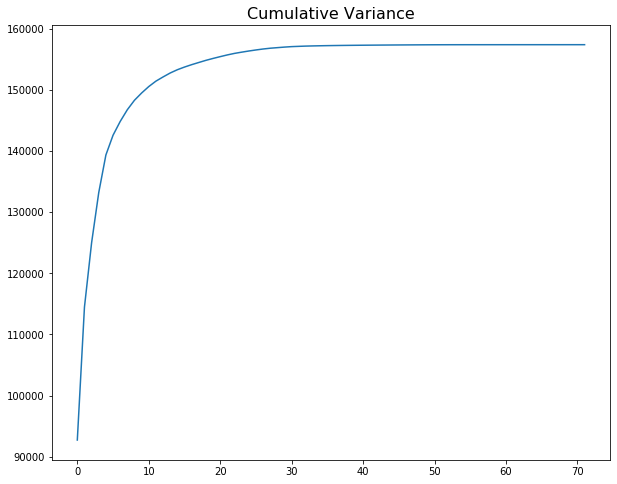

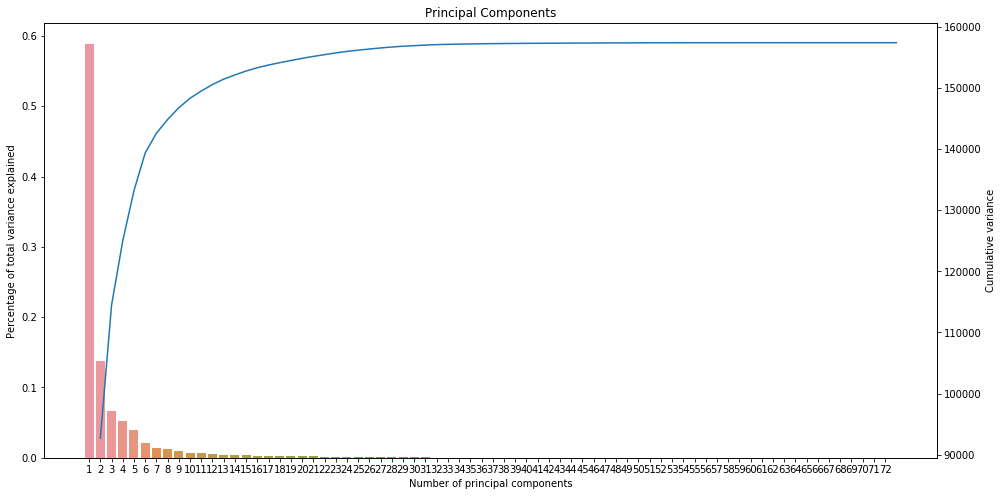

In [1502]:
cumvar2=np.cumsum(np.round(pca.explained_variance_, decimals=3)*100)
cumvar2=cumvar2/100 #cumulative sum of variance explained with [n] features
plt.figure(figsize=(10,8))
plt.title('Cumulative Variance', fontsize=16)
plt.plot(cumvar2)

plt.figure(figsize=(16, 8))
ax1 = sns.barplot(y=eigenvalues/eigenvalues.sum(), x=[i+1 for i in range(0,72)])
ax2 = ax1.twinx()
ax2 = sns.lineplot(y=cumvar2, x=[i+1 for i in range(0,72)])

plt.title('Principal Components')
ax1.set_xlabel('Number of principal components')
ax1.set_ylabel('Percentage of total variance explained')
ax2.set_ylabel('Cumulative variance')

In [333]:
for index, var in enumerate(cumvar):
    print(index+1, var)

1 58.9
2 72.7
3 79.4
4 84.60000000000001
5 88.50000000000001
6 90.60000000000001
7 92.00000000000001
8 93.20000000000002
9 94.20000000000002
10 95.00000000000001
11 95.70000000000002
12 96.30000000000001
13 96.70000000000002
14 97.10000000000002
15 97.40000000000002
16 97.70000000000002
17 97.90000000000002
18 98.10000000000002
19 98.30000000000003
20 98.50000000000003
21 98.70000000000003
22 98.90000000000003
23 99.10000000000004
24 99.20000000000003
25 99.30000000000003
26 99.40000000000002
27 99.50000000000001
28 99.60000000000001
29 99.7
30 99.8
31 99.8
32 99.8
33 99.8
34 99.8
35 99.8
36 99.8
37 99.8
38 99.8
39 99.8
40 99.8
41 99.8
42 99.8
43 99.8
44 99.8
45 99.8
46 99.8
47 99.8
48 99.8
49 99.8
50 99.8
51 99.8
52 99.8
53 99.8
54 99.8
55 99.8
56 99.8
57 99.8
58 99.8
59 99.8
60 99.8
61 99.8
62 99.8
63 99.8
64 99.8
65 99.8
66 99.8
67 99.8
68 99.8
69 99.8
70 99.8
71 99.8
72 99.8


Text(0, 0.5, 'Cumulative variance')

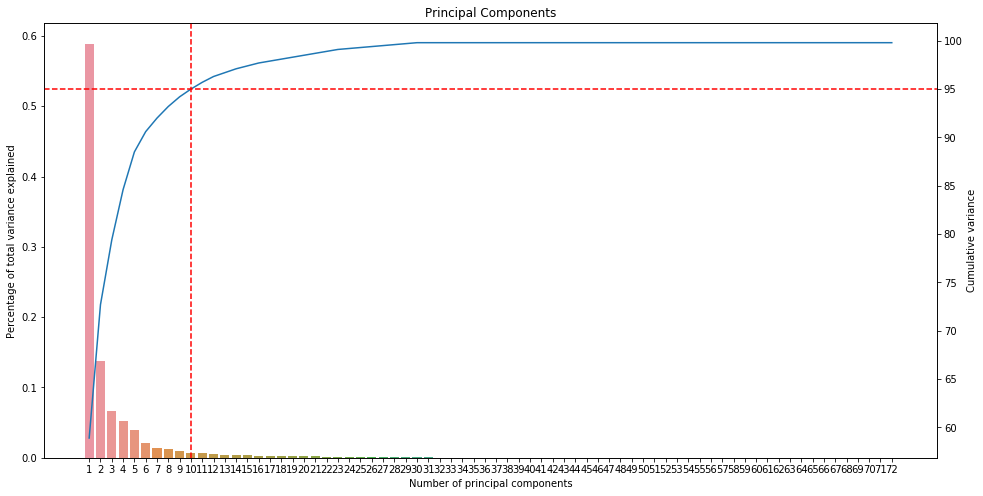

In [1691]:
plt.figure(figsize=(16, 8))
ax1 = sns.barplot(y=eigenvalues/eigenvalues.sum(), x=[i+1 for i in range(0,72)])
ax2 = ax1.twinx()
ax2 = sns.lineplot(y=cumvar, x=[i for i in range(0,72)])
ax3 = plt.axvline(9, color='red', linestyle='--')
ax3 = plt.axhline(95, color='red', linestyle='--')
plt.title('Principal Components')
ax1.set_xlabel('Number of principal components')
ax1.set_ylabel('Percentage of total variance explained')
ax2.set_ylabel('Cumulative variance')

In [1793]:
eigenvalues/eigenvalues.sum()

array([5.89005963e-01, 1.38215825e-01, 6.68695255e-02, 5.21656756e-02,
       3.90932157e-02, 2.05041254e-02, 1.43090728e-02, 1.22231108e-02,
       9.84813027e-03, 7.53058237e-03, 6.69594834e-03, 5.63632836e-03,
       4.36097634e-03, 4.11060011e-03, 3.39117708e-03, 2.78430397e-03,
       2.48346627e-03, 2.26409996e-03, 2.23821755e-03, 1.97971454e-03,
       1.86316153e-03, 1.79081162e-03, 1.58425385e-03, 1.27645508e-03,
       1.20195894e-03, 1.09046358e-03, 9.93343911e-04, 8.14208695e-04,
       5.93259681e-04, 5.80359769e-04, 4.89359269e-04, 2.86008986e-04,
       2.63653979e-04, 1.84876122e-04, 1.57743610e-04, 1.31828068e-04,
       1.04927559e-04, 9.96449401e-05, 7.96247149e-05, 7.73178721e-05,
       6.93700656e-05, 6.15899681e-05, 5.77649468e-05, 5.58569653e-05,
       5.40517075e-05, 4.74816814e-05, 4.62273622e-05, 4.34391873e-05,
       4.00306727e-05, 3.71303654e-05, 3.22966703e-05, 2.18097878e-05,
       1.29340161e-05, 1.09950964e-05, 5.26675145e-06, 4.77609153e-06,
      

In [1686]:
cumvar

array([58.9, 72.7, 79.4, 84.6, 88.5, 90.6, 92. , 93.2, 94.2, 95. , 95.7,
       96.3, 96.7, 97.1, 97.4, 97.7, 97.9, 98.1, 98.3, 98.5, 98.7, 98.9,
       99.1, 99.2, 99.3, 99.4, 99.5, 99.6, 99.7, 99.8, 99.8, 99.8, 99.8,
       99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8,
       99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8,
       99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8,
       99.8, 99.8, 99.8, 99.8, 99.8, 99.8])

Text(0, 0.5, 'Cumulative variance')

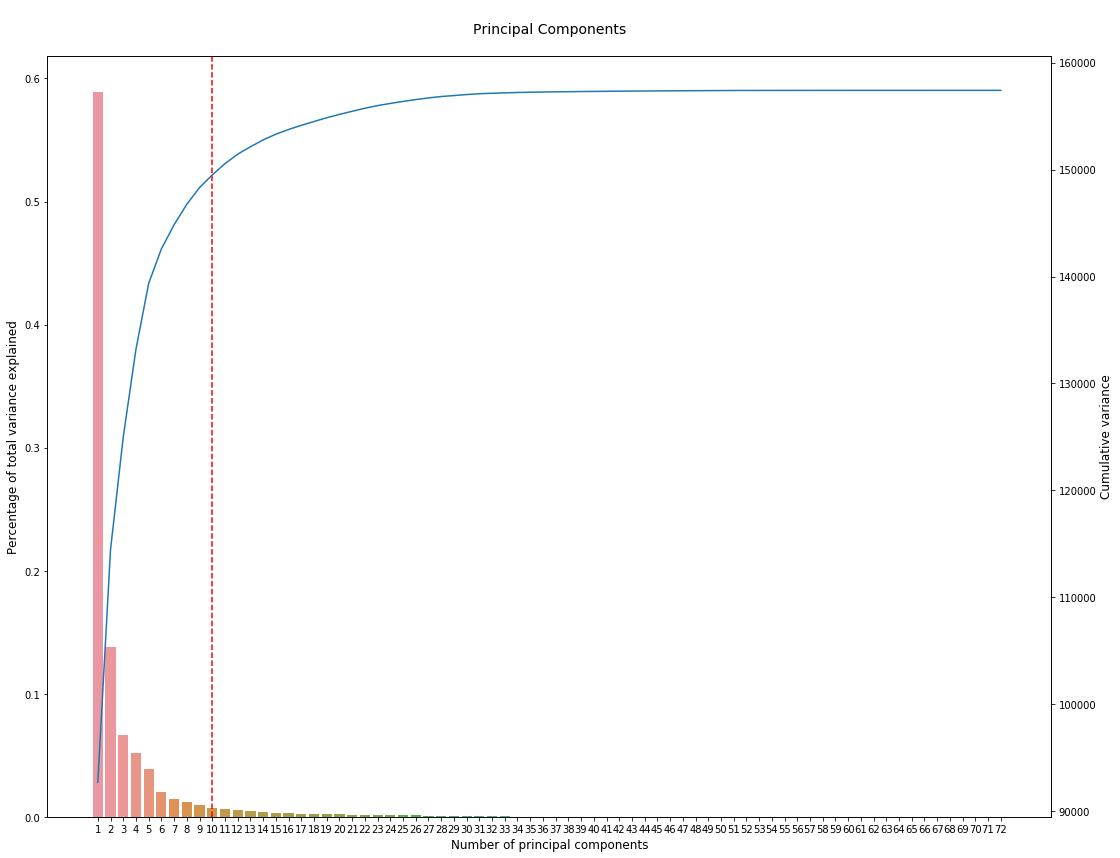

In [1792]:
plt.figure(figsize=(18, 14))
ax1 = sns.barplot(y=eigenvalues/eigenvalues.sum(), x=[i+1 for i in range(0,72)])
ax2 = ax1.twinx()
ax2 = sns.lineplot(y=cumvar2, x=[i for i in range(0,72)])
ax3 = plt.axvline(9, color='red', linestyle='--')
#ax3 = plt.axhline(149499.279, color='red', linestyle='--')
plt.title('\nPrincipal Components\n', fontsize=14)
ax1.set_xlabel('Number of principal components', fontsize=12)
ax1.set_ylabel('Percentage of total variance explained', fontsize=12)
ax2.set_ylabel('Cumulative variance', fontsize=12)

In [1768]:
cumvar2

array([ 92713.403, 114469.481, 124995.183, 133206.403, 139359.932,
       142587.416, 144839.758, 146763.756, 148313.916, 149499.279,
       150553.265, 151440.46 , 152126.906, 152773.941, 153307.735,
       153746.003, 154136.917, 154493.301, 154845.611, 155157.231,
       155450.505, 155732.39 , 155981.762, 156182.684, 156371.88 ,
       156543.526, 156699.885, 156828.047, 156921.43 , 157012.782,
       157089.81 , 157134.83 , 157176.331, 157205.432, 157230.262,
       157251.013, 157267.529, 157283.214, 157295.747, 157307.917,
       157318.836, 157328.531, 157337.624, 157346.416, 157354.924,
       157362.398, 157369.674, 157376.512, 157382.813, 157388.658,
       157393.742, 157397.175, 157399.211, 157400.942, 157401.771,
       157402.523, 157403.104, 157403.571, 157403.947, 157404.277,
       157404.574, 157404.839, 157405.071, 157405.29 , 157405.496,
       157405.683, 157405.862, 157406.031, 157406.191, 157406.345,
       157406.467, 157406.562])

**(5.3) [2 points] Interpret and summarise the above plot.** 
mark the point (number of components) which collectively explain at least 95% of the variance. Hint: Number components starting from 1.

The percentage of total variance explained reduces exponentially as the number of principal components increase. The highest percentage of total variance explained is when the number of principal components is 1. The number of components which collectively explain at least 95% of the variance is 10.

**(5.4) [4 points] Generate two figures, one for each of the first 2 principal components: in each, plot the component as three lines, one for each pollutant throughout one day cycle. (Hint: You will need to reshape the components with an 'F' ordering.)** 
TODO

In [1799]:
pca

PCA(copy=True, iterated_power='auto', n_components=72, random_state=0,
    svd_solver='auto', tol=0.0, whiten=False)

In [1800]:
first = pca.components_[0]
first

array([0.11215097, 0.09086027, 0.07897724, 0.07341798, 0.07258611,
       0.08954522, 0.13606713, 0.23629616, 0.32798103, 0.33143126,
       0.26948321, 0.1921154 , 0.13902059, 0.1042075 , 0.09518047,
       0.10472619, 0.12787722, 0.17630726, 0.21562405, 0.22766333,
       0.21112569, 0.18850754, 0.17185378, 0.14644391, 0.02002757,
       0.01753649, 0.01548071, 0.01473275, 0.0142814 , 0.01532315,
       0.01887431, 0.02937   , 0.0418395 , 0.04492784, 0.04066305,
       0.03398305, 0.0280984 , 0.02416408, 0.02271379, 0.02495818,
       0.02862167, 0.03516   , 0.04007307, 0.04075624, 0.03687264,
       0.03153639, 0.02786447, 0.02450537, 0.05564342, 0.04398285,
       0.03799077, 0.03503983, 0.03481364, 0.04488236, 0.07210518,
       0.12877807, 0.17819331, 0.1781181 , 0.14130447, 0.09631948,
       0.06648427, 0.04687449, 0.04211944, 0.04651581, 0.05872077,
       0.08497201, 0.10673481, 0.11407963, 0.106503  , 0.09595322,
       0.08818225, 0.07439665])

In [1801]:
second = pca.components_[1]
second

array([-0.04745149, -0.04101033, -0.04185256, -0.04451063, -0.06083489,
       -0.10966315, -0.21992145, -0.32882442, -0.30751882, -0.20808761,
       -0.10029169, -0.04004004, -0.00241942,  0.00982765,  0.01804449,
        0.03164461,  0.07288313,  0.14643682,  0.23015515,  0.27784013,
        0.28600896,  0.27366791,  0.25945372,  0.22550167, -0.01277506,
       -0.01127343, -0.01154454, -0.01143656, -0.01494786, -0.02150304,
       -0.03355187, -0.04377024, -0.03982087, -0.02926755, -0.01660407,
       -0.00856972, -0.00256148,  0.00046977,  0.0022182 ,  0.00513724,
        0.01147077,  0.02258824,  0.03396175,  0.04087693,  0.04267996,
        0.04045174,  0.0390799 ,  0.03463034, -0.02003714, -0.01713157,
       -0.01765469, -0.01952112, -0.02739844, -0.0540759 , -0.11614121,
       -0.17867553, -0.16779693, -0.11106679, -0.05080693, -0.01765669,
        0.00191087,  0.007297  ,  0.01121214,  0.01788754,  0.04016869,
        0.07936481,  0.12493687,  0.15090523,  0.15470045,  0.14

In [1802]:
mean = pca.mean_
reshaped_mean = np.reshape(mean, (3,24))

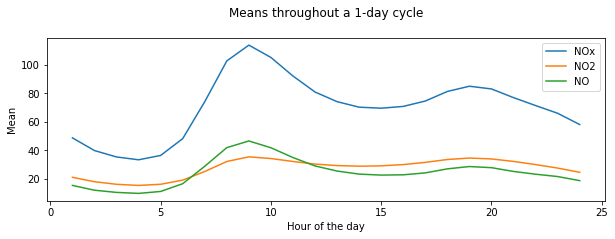

In [1803]:
# # 'NOx', 'NO2' and 'NO'
a = reshaped_mean[0]
b = reshaped_mean[1]
c = reshaped_mean[2]

plt.figure(figsize=(10,3))
plt.xlabel('Hour of the day')
plt.ylabel('Mean')
plt.title('Means throughout a 1-day cycle\n')
ax = sns.lineplot(y=a, x=[i+1 for i in range(0,24)], label='NOx')
ax = sns.lineplot(y=b, x=[i+1 for i in range(0,24)], label='NO2')
ax = sns.lineplot(y=c, x=[i+1 for i in range(0,24)], label='NO')
ax.legend()

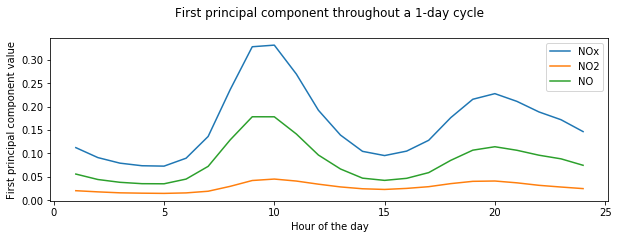

In [2093]:
# 'NOx', 'NO2' and 'NO'
first_NOx = first[0:24]
first_NO2 = first[24:48]
first_NO = first[48:72]

plt.figure(figsize=(10,3))
plt.xlabel('Hour of the day')
plt.ylabel('First principal component value')
plt.title('First principal component throughout a 1-day cycle\n')
ax = sns.lineplot(y=first_NOx, x=[i+1 for i in range(0,24)], label='NOx')
ax = sns.lineplot(y=first_NO2, x=[i+1 for i in range(0,24)], label='NO2')
ax = sns.lineplot(y=first_NO, x=[i+1 for i in range(0,24)], label='NO')
ax.legend()

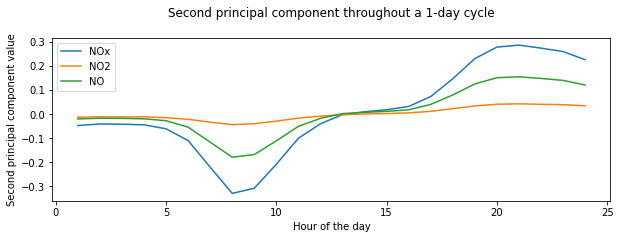

In [2094]:
# 'NOx', 'NO2' and 'NO'
second_NOx = second[0:24]
second_NO2 = second[24:48]
second_NO = second[48:72]


plt.figure(figsize=(10,3))
plt.xlabel('Hour of the day')
plt.ylabel('Second principal component value')
plt.title('Second principal component throughout a 1-day cycle\n')
ax = sns.lineplot(y=second_NOx, x=[i+1 for i in range(0,24)], label='NOx')
ax = sns.lineplot(y=second_NO2, x=[i+1 for i in range(0,24)], label='NO2')
ax = sns.lineplot(y=second_NO, x=[i+1 for i in range(0,24)], label='NO')
ax.legend()

**[5.5] (6 points) Focusing on the mean and first principal component, are there any significant patterns which emerge throughout the day? Hint: Think about car usage throughout
the day. What is different when interpreting the mean versus the first component? Hint:
Do peaks signify the same thing in both cases? Looking at the principal components
only, are there any signifcant differences between the pollutants? Why could this be
happening? Hint: You can refer to one of the limitations of PCA.**

For both the mean and PCA, the highest pollutant value belongs to NOx. The highest and lowest values recorded throughout the day are similar for both mean and first PCA, as well as for all three pollutants. The lowest value is around the 4th hour of the day (4AM) where most of the population is not commuting. The peak value is around the 9th hour of the day (9 AM). This is as expected because this is when people use their transportation vehicles to go to their place of destination for the day - work, school, etc. The value reaches a local minima at around the 15th hour of the day (3 PM), probably because most people are doing indoor activities. The pollutant value peaks again at around the 20th hour (8 PM), when everyone is communting home after completing their day.


THE PCA
The first principal component accounts for as much of the variability in the data as possible, and each succeeding component accounts for as much of the remaining variability as possible.

TODO: CONTINUE EXPLAINING ABOUT MEAN VS PCA

The NO levels have a general spike at about 8am and 5pm with a local minima at 1pm and a global minima at around 4 pm.
The first PCA follows a similar pattern to that of the mean. A multiplication between the two would lead to a square. As expected, this would result in a huge range of values. As shown by the bar graph above, the first PCA accounts for almost 60% of the variance in the data.
The second principal axis follows the multiplicative opposite; if we were to multiply the 2nd PCA with a data point, it would almost always add to a constant. As expected, the second PCA has a much lower variance as compared to the first PCA; roughly 15% of the variance shown by the raw data.

--- 

LATEX ANSWER

For both the mean and first principal component, the general pattern is similar - pollutant levels are lowest at 4 AM, has a global maximum at 9 AM, reached a local minima at 3 PM and reaches a local maxima at 8 PM. This corresponds to the general car usage throughout the day, where people commute in the morning to work/school/etc. and comes home in the evening. The peak in the mean shows the highest average measurement for a pollutant. The first principal component accounts for almost 60% of the data and the peak signifies the highest variance amongst the 72 dimensions. The second component accounts for roughly 15% of the variance of our data and has a much lower variance than the first principal component. This is as expected because the first principal component accounts for as much of the variability in the data as possible, and all the components after that accounts for as much of the remaining variability as possible.

# Question 6: (41 points) Regression

**Given our understanding of the correlation between signals and sites, we will
now attempt to predict the NOx level for Site 17 given the value at the
other sites. We will evaluate our models using the Root Mean Squared Error
(RMSE) i.e. the square root of the mean_squared_error score by sklearn.**


**To do this we will again make use of the time-aligned data in BristolAir_SiteAligned .
Reload this dataset and extract only the NOx values. Then split this into a feature-set
( X ) and target value for site 17 ( y ).**

In [1994]:
bristol_aligned_loc = os.path.join(os.getcwd(), 'Data', 'PartB', 'BristolAir_SiteAligned.csv')
bristol_sitealigned = pd.read_csv(bristol_aligned_loc, delimiter=',', compression='bz2', header=[0,1], 
                              parse_dates=[0])

In [1995]:
bristol_sitealigned_NOx = bristol_sitealigned[bristol_sitealigned.columns[range(1,11)]]

In [1996]:
bristol_sitealigned_NOx

NOx                                                               \
           1       2       4       6     7      10     12      14      16   
0      10.50   15.25   21.50   23.75   8.0   53.25   19.0  201.75   40.00   
1       9.75    9.50   11.50   23.25  10.0   30.50   19.0  138.00   42.00   
2      67.25   88.75   66.00  163.75  36.0  203.75  155.0  429.00   94.00   
3      71.75  124.50  135.00   96.50  38.0  172.50  338.0  734.00  196.50   
4      82.00  125.00  104.25  106.50  36.0  193.00  321.0  679.00  329.00   
...      ...     ...     ...     ...   ...     ...    ...     ...     ...   
14890  53.00   67.25  143.50  123.25  29.0   86.75  166.0  219.75  129.25   
14891  29.50   42.50   81.00   75.75  36.0   87.25  168.0  171.75   91.75   
14892  25.75   44.75   88.25   46.25  27.0  102.00  164.0  167.00   90.25   
14893  40.75   46.75   80.50   69.50  17.0   68.00  138.0  167.25  100.75   
14894  19.00   37.00   70.25   33.50  15.0   79.75  111.0  186.25   65.50   

               
           17  
0       41.00  
1       37.00  
2      127.25  
3      150.50  
4      151.25  
...       ...  
14890  104.25  
14891   73.50  
14892   94.75  
14893   89.50  
14894   65.75  

[14895 rows x 10 columns]

In [1997]:
X = bristol_sitealigned.NOx.drop('17', 1)
y = bristol_sitealigned.NOx['17']

In [1998]:
X = pd.DataFrame(X)
X

,1,2,4,6,7,10,12,14,16
0,10.50,15.25,21.50,23.75,8.0,53.25,19.0,201.75,40.00
1,9.75,9.50,11.50,23.25,10.0,30.50,19.0,138.00,42.00
2,67.25,88.75,66.00,163.75,36.0,203.75,155.0,429.00,94.00
3,71.75,124.50,135.00,96.50,38.0,172.50,338.0,734.00,196.50
4,82.00,125.00,104.25,106.50,36.0,193.00,321.0,679.00,329.00
5,62.75,108.00,132.75,102.50,46.0,163.50,393.0,682.00,277.25
6,71.25,132.00,149.75,82.25,52.0,208.25,435.0,867.75,371.25
7,62.50,136.00,176.00,123.00,67.0,229.25,374.0,1023.75,320.00
8,75.50,141.25,186.25,197.50,80.0,242.00,298.0,959.50,282.25
9,101.75,135.75,165.00,217.25,63.0,202.25,246.0,682.25,292.00


In [2013]:
y = bristol_sitealigned_NOx[bristol_sitealigned_NOx.columns[9:10]].values

In [2014]:
y = pd.DataFrame(y)
y

,0
0,41.00
1,37.00
2,127.25
3,150.50
4,151.25
5,168.00
6,177.75
7,209.50
8,260.00
9,175.00


**[6.1] (2 points) First things first: since we are dealing with a supervised task, we will
need to split our data into a training and testing set. Furthermore, since some of our
regressors will involve hyper-parameter tuning, we will also need a validation set. Use the
multi_way_split() method from mpctools.extensions.skext to split the data into a
Training (60%), Validation (15%) and Testing (25%) set: use the ShuffleSplit object from
sklearn for the splitter. Set the random state to 0. Hint: The method gives you the
indices of the split for each set, which can then be applied to multiple matrices. Report
the sizes of each dataset.**

In [2015]:
from mpctools.extensions.skext import multi_way_split
from sklearn.model_selection import ShuffleSplit

In [2016]:
cv = ShuffleSplit()

Training set: 8937, validation set: 2234, testing set: 3724

In [2017]:
train_idx, val_idx, test_idx = multi_way_split(X.values, [0.6,0.15,0.25], ShuffleSplit, random_state=0)

In [2018]:
X_trn = X.iloc[train_idx]
X_trn.shape

(8937, 9)

In [2019]:
X_val = X.iloc[val_idx]
X_val.shape

(2234, 9)

In [2020]:
X_test = X.iloc[test_idx]
X_test.shape

(3724, 9)

In [2021]:
sum = X_trn.size + X_val.size + X_test.size
print(str(X_trn.size/sum))
print(str(X_val.size/sum))
print(str(X_test.size/sum))

0.6
0.14998321584424304
0.25001678415575695


In [2022]:
X.shape

(14895, 9)

In [2023]:
sum

134055

In [2024]:
train_idx_y, val_idx_y, test_idx_y = multi_way_split(y.values, [0.6,0.15,0.25], ShuffleSplit, random_state=0)
train_idx_y

array([ 8550,  5582,  3153, ...,  9845, 10799,  2732])

In [2025]:
indices = multi_way_split(y.values, [0.6,0.15,0.25], ShuffleSplit, random_state=0)
indices[0] == train_idx_y, indices[1] == val_idx_y

(array([ True,  True,  True, ...,  True,  True,  True]),
 array([ True,  True,  True, ...,  True,  True,  True]))

In [2026]:
y_trn = y.iloc[train_idx_y]
y_trn.shape

(8937, 1)

In [2027]:
y_val = y.iloc[val_idx_y]
y_val.shape

(2234, 1)

In [2028]:
y_test = y.iloc[test_idx_y]
y_test.shape

(3724, 1)

**(6.2) [4 points] Let us start with a baseline. By using only the y-values, what baseline regressor can you define (indicate what it does)? Implement it and report the RMSE on the training and validation sets. Interpret this relative to the statistics of the data.**

In [2029]:
y

,0
0,41.00
1,37.00
2,127.25
3,150.50
4,151.25
5,168.00
6,177.75
7,209.50
8,260.00
9,175.00


In [2030]:
len(y)

14895

**If you are working on a regression problem, you can use a central tendency measure as the result for all predictions, such as the mean or the median.**

The baseline regressor that I used is to assign the central tendency measure as the result for all predictions. The central tendency measure that I chose is the mean. The RMSE I obtained form jus

In [2031]:
baseline_prediction = [y_trn.mean()]*len(y_trn)
baseline_prediction = np.array(baseline_prediction)

In [2032]:
baseline_prediction

array([[98.32057849],
       [98.32057849],
       [98.32057849],
       ...,
       [98.32057849],
       [98.32057849],
       [98.32057849]])

In [2033]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [2034]:
rmse = mean_squared_error(baseline_prediction, y_trn)**0.5
print('RMSE value of the baseline regressor on the training set is: {}'.format(rmse))

baseline_prediction = [y_trn.mean()]*len(y_val)
baseline_prediction = np.array(baseline_prediction)

rmse2 = mean_squared_error(baseline_prediction, y_val)**0.5
print('RMSE value of the baseline regressor on the validation set is: {}'.format(rmse2))

RMSE value of the baseline regressor on the training set is: 79.71384620780579
RMSE value of the baseline regressor on the validation set is: 80.2050030835507


TODO: explain the baseline (what it does) and report the RMSE. Interpret this relative to the statistics of the data????

**(6.3) [3 points] Let us now try a more interesting algorithm: specifically, we will start with LinearRegression. Train the regressor on the training data and report the RMSE on the training and validation set, and comment on the relative performance to the baseline.**

In [2035]:
lm = LinearRegression()
lm.fit(X_trn, y_trn)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [2036]:
print('Training accuracy: {}'.format(lm.score(X_trn, y_trn)))

Training accuracy: 0.7502784540105178


In [2037]:
print('Training accuracy: {}'.format(lm.score(X_val, y_val)))

Training accuracy: 0.736958153044227


In [2038]:
print('Training accuracy: {}'.format(lm.score(X_test, y_test)))

Training accuracy: 0.7364274664603956


In [2039]:
y_pred = lm.predict(X_trn).astype('float')

In [2040]:
rmse = mean_squared_error(y_trn, y_pred)**0.5
print('RMSE value for the training set is: {}'.format(rmse))

RMSE value for the training set is: 39.83472027954455


In [2041]:
y_pred_val = lm.predict(X_val).astype('float')
validation_rmse = mean_squared_error(y_val, y_pred_val)**0.5
print('RMSE value for the validation set is: {}'.format(validation_rmse))

RMSE value for the validation set is: 41.12740349422


The RMSE value for the training set is: 39.835
The RMSE value for the validation set is: 41.127

From this we can observe that the Linear Regression algorithm does better than the baseline regressor, with an RMSE value of 39.835 compared to the baseline's 79.713 for the training set, and an RMSE value of 41.127 compared to the baseline's 80.205 for the validation set.

**[6.4] (5 points) We want to explore further what the model is learning. Explain why in Linear Regression, we cannot just blindly use the weights of the regression coefficients to evaluate the relative importance of each feature, but rather we have to normalise the features. By referring to the documentation for the LinearRegression implementation in SKLearn, explain what the normalisation does and how it helps in comparing features. Will this affect the performance of the Linear Regressor?** 

The magnitude of the regression coefficient indicates how much a unit-change in the independent variable affects the target variable, therefore it depends on the magnitude of the independent and dependent variable to begin with. If the two attributes are not on the same scale, we have to normalize them so that we can compare them. When you set \{texttt}{normalize=True}, the regressor's X values will be normalized before regression. The normalization method is subtracting the mean and dividing by the l2-norm.

**[6.5] (5 points) Retrain the regressor, setting `normalize=True` and report (in a table) the ratio of the relative importance of each feature. Which is the most/least important site? How do they compare with the correlation coefficients for Site 17 as computed in Question 4.f. and why do you think that is?** 

In [2042]:
lm = LinearRegression(fit_intercept=True, normalize=True)

In [2043]:
lm.fit(X_trn, y_trn)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [2044]:
lm.coef_

array([[ 0.11555569,  0.00994714,  0.13413921, -0.00679908,  0.05938753,
         0.0797791 ,  0.12910957,  0.09450729,  0.16182776]])

In [2045]:
sites = [1,2,4,6,7,10,12,14,16]
coefs = [0.11555569,  0.00994714,  0.13413921, -0.00679908,  0.05938753,
         0.0797791 ,  0.12910957,  0.09450729,  0.16182776]
zipped = zip(sites,coefs)
tups = []
for site, coef in zipped:
    print(site, coef)
    tups.append((site, coef))
    #print('The correlation coefficient of site 17 with site {} is {}'.format(site, coef))

1 0.11555569
2 0.00994714
4 0.13413921
6 -0.00679908
7 0.05938753
10 0.0797791
12 0.12910957
14 0.09450729
16 0.16182776


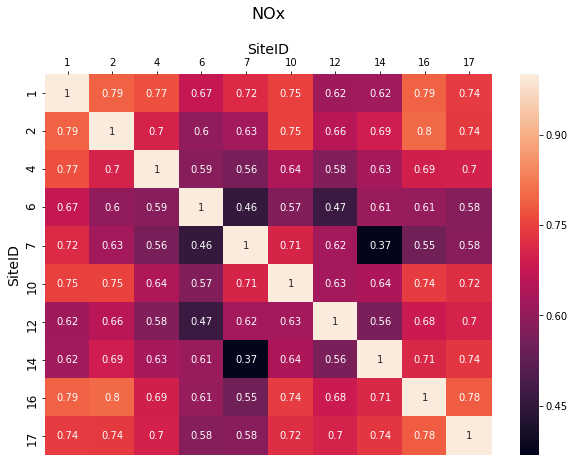

In [2046]:
NOx = bristol_aligned_wo_dates[bristol_aligned_wo_dates.columns[range(10)]]


plt.figure(figsize = (10,7))
plt.xticks([1,2,4,6,7,10,12,14,16,17], fontsize=12)
plt.yticks([1,2,4,6,7,10,12,14,16,17], fontsize=12)
ax = sns.heatmap(NOx.corr(method='pearson'), 
                xticklabels=[1,2,4,6,7,10,12,14,16,17], 
                yticklabels=[1,2,4,6,7,10,12,14,16,17], 
                annot=True)
ax.set_title('NOx\n', fontsize=16)
ax.set_ylabel('SiteID', fontsize=14)
ax.set_xlabel('SiteID', fontsize=14)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

[0.11555569,  0.00994714,  0.13413921, -0.00679908,  0.05938753,
         0.0797791 ,  0.12910957,  0.09450729,  0.16182776]

In [2047]:
tups.sort(key=lambda x: x[1])
tups

firstcolumn = []
secondcolumn = []
for i, j in tups:
    firstcolumn.append(i)
    secondcolumn.append(j)
    
data5 = {'SiteID':firstcolumn[0:5], 'Correlation Coefficient':secondcolumn[0:5]} 

df5 = pd.DataFrame(data5) 
  
# Print the output. 
df5.to_latex(index=False)

with open('mytable5.tex', 'w') as tf:
     tf.write(df5.to_latex(index=False))

df5

,SiteID,Correlation Coefficient
0,6,-0.006799
1,2,0.009947
2,7,0.059388
3,10,0.079779
4,14,0.094507


In [2048]:
data6 = {'SiteID':firstcolumn[5:9], 'Correlation Coefficient':secondcolumn[5:9]} 

df6 = pd.DataFrame(data6) 
  
# Print the output. 
df6.to_latex(index=False)

with open('mytable6.tex', 'w') as tf:
     tf.write(df6.to_latex(index=False))

df6

,SiteID,Correlation Coefficient
0,1,0.115556
1,12,0.129110
2,4,0.134139
3,16,0.161828


Talk about the correlation in linear regression, because it has big weight and high correlation. affects predictor valie

The most important site is site 16 with a correlation coefficient of 0.162 and the least important site is site 6 with a correlation coefficient of -0.007. These values correspond to the values computed in Question 4.f. This is because if the variable is highly correlated to the target variable, it will have a big weight in linear regression, hence it affects the predictor value more.

**[6.6] (5 points) It might be that with non-linear models, we may get better performance. Let us try to use K-Nearest-Neighbors. Train a KNN regressor with default parameters on the training set and report performance on the training and validation set. Hint: it might be beneficial to set n_jobs=-1 to improve performance. How does it compare with Linear Regression in terms of performance on both sets? What is a limitation of the KNN algorithm for our dataset?** TODO: explain

Maybe:

KNN regression RMSE on the training set: 32.437
KNN regression RMSE on the validation set: 40.307

Linear Regression RMSE on the training set: 39.835
Linear Regression RMSE on the validation set: 41.127

From these values we can observe that the KNN regression algorithm has a better performance (lower RMSE) compared to the linear regression algorithm.

NOTANSWERED: limitation of the KNN algorithm on our dataset

Since our dataset consist of continuous values, KNN might overfit.

In [1479]:
knn = KNeighborsRegressor(n_jobs=-1)
knn.fit(X_trn, y_trn)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                    weights='uniform')

In [1878]:
knn = KNeighborsRegressor(n_jobs=-1)
knn.fit(X_trn, y_trn)
y_prediction_training = knn.predict(X_trn)
y_prediction_validation = knn.predict(X_val)
print('KNN classification accuracy on training set: {}'.format(knn.score(X_trn, y_trn)))
print('KNN classification accuracy on validation set: {}'.format(knn.score(X_val, y_val)))

KNN classification accuracy on training set: 0.8344230451139573
KNN classification accuracy on validation set: 0.7473457720103046


In [1879]:
print('KNN classification RMSE on training set: {}'.format(mean_squared_error(y_prediction_training, y_trn)**0.5))
print('KNN classification RMSE on validation set: {}'.format(mean_squared_error(y_prediction_validation, y_val)**0.5))

KNN classification RMSE on training set: 32.43647936515854
KNN classification RMSE on validation set: 40.3071558368958


In [1874]:
lr = LinearRegression()
lr.fit(X_trn, y_trn)
y_prediction_training = lr.predict(X_trn)
y_prediction_validation = lr.predict(X_val)
print('LR accuracy on training set: {}'.format(lr.score(X_trn, y_trn)))
print('LR accuracy on validation set: {}'.format(lr.score(X_val, y_val)))

LR accuracy on training set: 0.7502784540105178
LR accuracy on validation set: 0.736958153044227


In [1877]:
print('LR classification RMSE on training set: {}'.format(mean_squared_error(y_prediction_training, y_trn)**0.5))
print('LR classification RMSE on validation set: {}'.format(mean_squared_error(y_prediction_validation, y_val)**0.5))

LR classification RMSE on training set: 39.83472027954455
LR classification RMSE on validation set: 41.12740349422


**[6.7] (4 points) The KNN regression allows setting a number of hyper-parameters. We will optimise only one: the number of neighbors to use. By using the validation set, find the optimal value for the `n_neighbors` parameter out of the values `[2,4,8,16,32]`. Plot the training/validation RMSE and indicate (for example with a line) the best value for `n_neighbors`.** TODO

In [1955]:
# For loop to find the best n_neighbors value
rmse_val = []
rmse_trn = []
n_neighbors = [2,4,8,16,32]
for n in n_neighbors:
    knn = KNeighborsRegressor(n_neighbors=n, n_jobs=-1)
    knn.fit(X_trn, y_trn)
    y_pred_val = knn.predict(X_val)
    y_pred_trn = knn.predict(X_trn)
    val_score = mean_squared_error(y_val, y_pred_val)**0.5
    rmse_val.append(val_score)
    trn_score = mean_squared_error(y_trn, y_pred_trn)**0.5
    rmse_trn.append(trn_score)
    print('RMSE with {} neighbors on training set: {}'.format(n, trn_score))
    print('RMSE with {} neighbors on validation set: {}'.format(n, val_score))

RMSE with 2 neighbors on training set: 25.149918774899085
RMSE with 2 neighbors on validation set: 42.95551269008171
RMSE with 4 neighbors on training set: 31.42280882774953
RMSE with 4 neighbors on validation set: 40.595609577419665
RMSE with 8 neighbors on training set: 34.11215836361028
RMSE with 8 neighbors on validation set: 39.37125304834977
RMSE with 16 neighbors on training set: 35.47142878389425
RMSE with 16 neighbors on validation set: 38.901851355962386
RMSE with 32 neighbors on training set: 36.715347607557376
RMSE with 32 neighbors on validation set: 39.13083888473987


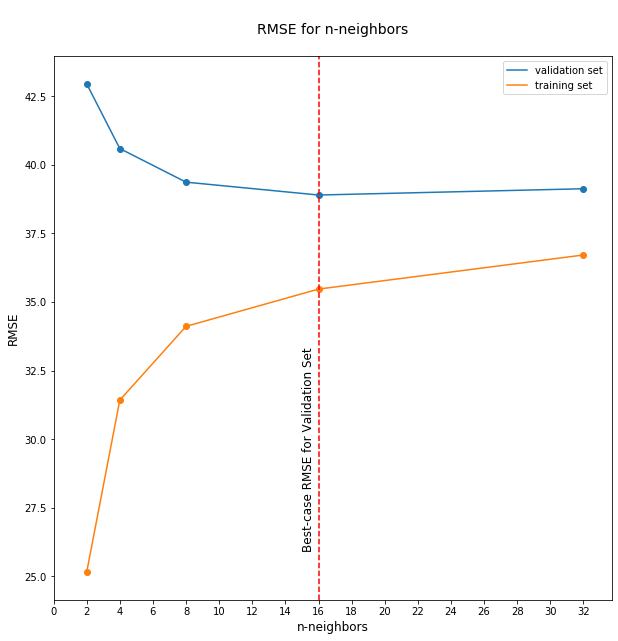

In [1957]:
# Plot the line graph
plt.figure(figsize=(10,10))
plt.plot(n_neighbors,rmse_val, label='validation set')
plt.plot(n_neighbors,rmse_trn, label='training set')
plt.scatter(n_neighbors, rmse_val)
plt.scatter(n_neighbors, rmse_trn)
plt.xticks([2*i for i in range(0,17)])
plt.title('\nRMSE for n-neighbors\n', fontsize=14)
plt.xlabel('n-neighbors', fontsize=12)
plt.ylabel('RMSE', fontsize=12)
plt.axvline(x=16, color='red', linestyle='--')
plt.legend()
plt.text(15, 26, 'Best-case RMSE for Validation Set', rotation=90, fontsize=12)
plt.show()

# BEST N IS 16

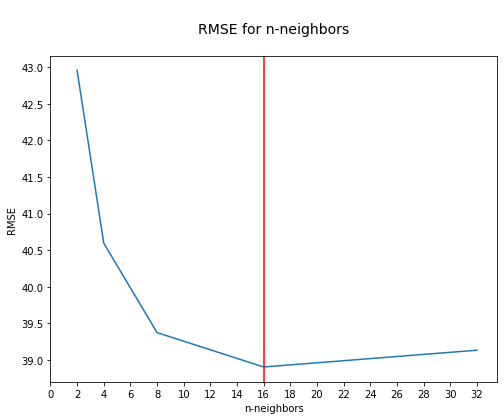

In [1958]:
plt.figure(figsize=(8,6))
plt.plot(n_neighbors,rmse_val)
plt.xticks([2*i for i in range(0,17)])
plt.title('\nRMSE for n-neighbors\n', fontsize=14)
plt.xlabel('n-neighbors')
plt.axvline(x=16, color='red')
plt.ylabel('RMSE')
plt.show()


Tomek: "for training, the less neighbors the better because every point is assigned to itself. for validation, initially it is better but then when you exceed a certain point it starts decreasing because it looks at neighbors which aren't really that close to it."

**[6.8] (1 point) What is the best-case RMSE performance on the validation set for KNN?** 
The best-case RMSE performance on the validation set is 38.902, when the number of nearest neighbors is 16.

**[6.9] (4 points) Let us try one last regression algorithm: we will now use `DecisionTreeRegressor`. Again, the algorithm contains a number of hyper-parameters, and we will optimise the depth of the tree. Train a series of Decision Tree Regressors, optimising (over the VALIDATION SET) the `max_depth` over the values `[2,4,8,16,32,64]`. Set `random_state=0`. Plot the training/validation RMSE and indicate (as before) the best value for `max_depth`.**

In [1959]:
# Define the regressor
dt = DecisionTreeRegressor()
dt.fit(X_trn, y_trn)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [1960]:
# Do the loop
rmse_val = []
rmse_trn = []
depths = [2,4,8,16,32,64]
for d in [2,4,8,16,32,64]:
    dt = DecisionTreeRegressor(max_depth=d, random_state=0)
    dt.fit(X_trn, y_trn)
    y_pred_val = dt.predict(X_val)
    y_pred_trn = dt.predict(X_trn)
    val_score = mean_squared_error(y_val, y_pred_val)**0.5
    rmse_val.append(val_score)
    trn_score = mean_squared_error(y_trn, y_pred_trn)**0.5
    rmse_trn.append(trn_score)
    print('RMSE with {} neighbors on training set: {}'.format(d, trn_score))
    print('RMSE with {} neighbors on validation set: {}'.format(d, val_score))

RMSE with 2 neighbors on training set: 52.6134623455056
RMSE with 2 neighbors on validation set: 53.25095179219833
RMSE with 4 neighbors on training set: 43.38835611468483
RMSE with 4 neighbors on validation set: 46.12769116861275
RMSE with 8 neighbors on training set: 33.27961915442297
RMSE with 8 neighbors on validation set: 45.84380928287788
RMSE with 16 neighbors on training set: 13.672221342095378
RMSE with 16 neighbors on validation set: 53.4486396323909
RMSE with 32 neighbors on training set: 0.09114909269816067
RMSE with 32 neighbors on validation set: 55.62441997967441
RMSE with 64 neighbors on training set: 0.0
RMSE with 64 neighbors on validation set: 55.9470657647145


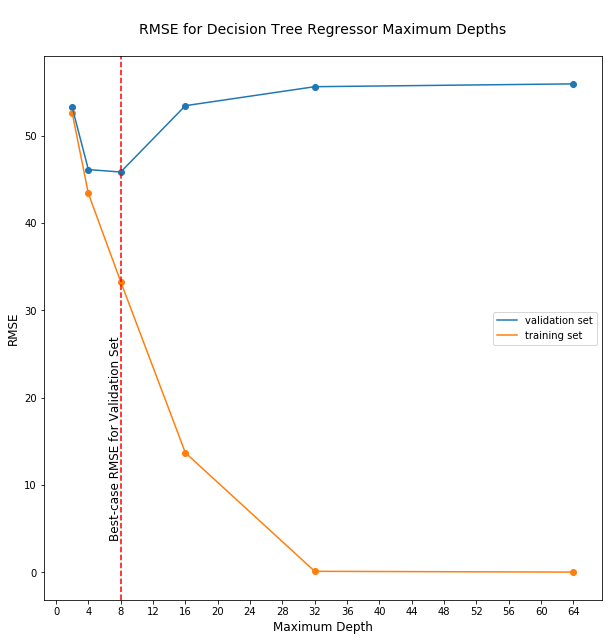

In [1963]:
# Plot graph of both
plt.figure(figsize=(10,10))
plt.plot(depths,rmse_val, label='validation set')
plt.plot(depths,rmse_trn, label='training set')
plt.scatter(depths, rmse_val)
plt.scatter(depths, rmse_trn)
plt.xticks([4*i for i in range(0,17)])
plt.title('\nRMSE for Decision Tree Regressor Maximum Depths\n', fontsize=14)
plt.xlabel('Maximum Depth', fontsize=12)
plt.ylabel('RMSE', fontsize=12)
plt.legend()
plt.axvline(x=8, color='red', linestyle='--')
plt.text(6.5, 4, 'Best-case RMSE for Validation Set', rotation=90, fontsize=12)
plt.show()

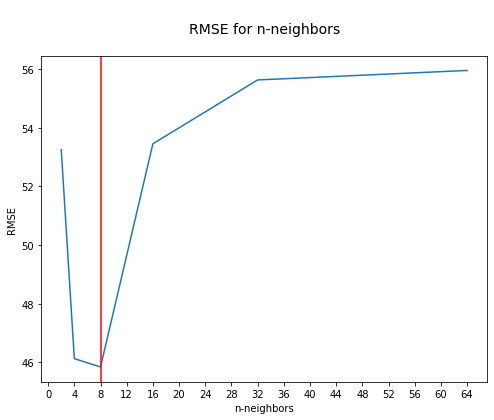

In [1466]:
# Graph to check best depth
plt.figure(figsize=(8,6))
plt.plot(depths,rmse_val)
plt.xticks([4*i for i in range(0,17)])
plt.title('\nRMSE for n-neighbors\n', fontsize=14)
plt.xlabel('n-neighbors')
plt.axvline(x=8, color='red')
plt.ylabel('RMSE')
plt.show()

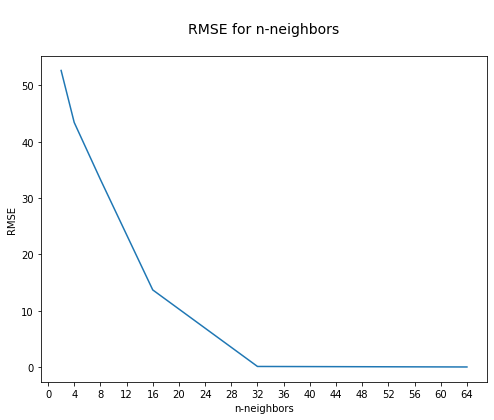

In [1467]:
# Graph to check best depth
plt.figure(figsize=(8,6))
plt.plot(depths,rmse_trn)
plt.xticks([4*i for i in range(0,17)])
plt.title('\nRMSE for n-neighbors\n', fontsize=14)
plt.xlabel('n-neighbors')
plt.ylabel('RMSE')
plt.show()

**[6.10] (3 points) What is the best-case RMSE performance on the VALIDATION set? What do you notice from the plot about the performance of the Decision Tree Regressor?** TODO: observe and explain
<br>Best case on the validation = 8
<br>On training set = converges to 0

The best-case RMSE performance on the validation set is 45.844, with a corresponding maximum depth value set at 8. The Decision Tree Regressor performs slightly worse compared to the KNN regressor, with a higher best-case RMSE. For the training set, increasing max_depth reduces the RMSE value to a point where it goes to zero. For the validation set, increasing the value of max_depth will simply overfit the training data without capturing important patterns and cause the error to increase. If you set it too low, the decision tree regressor will have limited flexibility to capture these patterns in the training data, causing the error to increase as well.

---

LATEX ANSWER

The best-case RMSE on the validation set is 45.844, with a corresponding maximum depth value set at 8. For the training set, increasing max depth reduces the RMSE to zero. For the validation set, increasing max depth overfits the training data without capturing useful patterns and cause RMSE to increase.

**[6.11] (5 points) To conclude let us now compare all the models on the TESTING set. Combine the TRAINING and VALIDATION sets and retrain the model from each family on it: in cases where we optimised hyper-parameters, set this to the best-case value. Report the testing-set performance of each model in a table. Hint: you should have 4 values.** TODO: compare and explain and make table

In [2082]:
X_combined = pd.DataFrame(X_trn)
X_combined.append(X_val)
X_combined = pd.concat([X_trn, X_val])

In [2083]:
y_combined = y_trn
y_combined.append(y_val)
y_combined = pd.concat([y_trn, y_val])

In [2084]:
print(X_trn.size + X_val.size)
print(y_trn.size + y_val.size)
print(X_combined.size)
print(y_combined.size)

100539
11171
100539
11171


In [2085]:
# BASELINE
baseline_prediction = [y_combined.mean()]*len(y_test)
rmse = mean_squared_error(y_test, baseline_prediction)**0.5
print('RMSE value of the baseline regressor ON THE TEST DATA is: {}'.format(rmse))

RMSE value of the baseline regressor ON THE TEST DATA is: 78.95212954026199


In [2086]:
# Linear Regressor
lr_test = LinearRegression(normalize=True)
lr_test.fit(X_combined, y_combined)
y_pred_lr_test = lr_test.predict(X_test)
rmse = mean_squared_error(y_pred_lr_test, y_test)**0.5
print('LR RMSE on TESTING set: {}'.format(rmse))

LR RMSE on TESTING set: 40.509026852617026


In [2087]:
# KNN Regressor
knn_test = KNeighborsRegressor(n_jobs=-1, n_neighbors=16)
knn_test.fit(X_combined, y_combined)
y_pred_knn_test = knn_test.predict(X_test)
rmse = mean_squared_error(y_pred_knn_test, y_test)**0.5
print('KNN RMSE on TESTING set: {}'.format(rmse))

KNN RMSE on TESTING set: 37.98496506868247


In [2088]:
# Decision Tree Regressor
dt_test = DecisionTreeRegressor(max_depth=8, random_state=0)
dt_test.fit(X_combined, y_combined)
y_pred_dt_test = dt_test.predict(X_test)
rmse = mean_squared_error(y_pred_dt_test, y_test)**0.5
print('DT RMSE on TESTING set: {}'.format(rmse))

DT RMSE on TESTING set: 43.06887110128105


In [2089]:
data={'Regressor':['Baseline Regressor', 'Linear Regressor', 'KNN Regressor', 'Decision Tree Regressor'],
     'Root Mean Squared Error on Testing Set Prediction':[78.95212954026199, 40.509026852617026, 
                                                          37.98496506868247, 43.06887110128105]}

In [2090]:
sixpointonetable = pd.DataFrame(data=data)
sixpointonetable

,Regressor,Root Mean Squared Error on Testing Set Prediction
0,Baseline Regressor,78.952130
1,Linear Regressor,40.509027
2,KNN Regressor,37.984965
3,Decision Tree Regressor,43.068871


In [2091]:
sixpointonetable.to_latex(index=False)

'\\begin{tabular}{lr}\n\\toprule\n               Regressor &  Root Mean Squared Error on Testing Set Prediction \\\\\n\\midrule\n      Baseline Regressor &                                          78.952130 \\\\\n        Linear Regressor &                                          40.509027 \\\\\n           KNN Regressor &                                          37.984965 \\\\\n Decision Tree Regressor &                                          43.068871 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [2092]:
data7 = {'Regressor':['Baseline', 'Linear', 'KNN', 'Decision Tree'],
     'RMSE on Testing Set':[78.95212954026199, 40.509026852617026, 
                                                          37.98496506868247, 43.06887110128105]}

df7 = pd.DataFrame(data=data7)


with open('mytable7.tex', 'w') as tf:
     tf.write(df7.to_latex(index=False))

df7

,Regressor,RMSE on Testing Set
0,Baseline,78.952130
1,Linear,40.509027
2,KNN,37.984965
3,Decision Tree,43.068871


In [2080]:
data8 = {'Regressor':['KNN', 'Decision Tree'],
     'RMSE on Testing Set':[37.98496506868247, 43.06887110128105]}

df8 = pd.DataFrame(data=data8)


with open('mytable8.tex', 'w') as tf:
     tf.write(df8.to_latex(index=False))

df8

,Regressor,RMSE on Testing Set
0,KNN,37.984965
1,Decision Tree,43.068871


In [2081]:
data9 = {'Regressor':['Baseline', 'Linear'],
     'RMSE on Testing Set':[78.95212954026199, 40.509026852617026]}

df9 = pd.DataFrame(data=data9)


with open('mytable9.tex', 'w') as tf:
     tf.write(df9.to_latex(index=False))

df9

,Regressor,RMSE on Testing Set
0,Baseline,78.952130
1,Linear,40.509027


Introductory Applied Machine Learning Coursework 2 
<br>Completed by Athiya Deviyani
<br>UUN: s1709906
